In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 3. Tiền xử lý dữ liệu - Data preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CS116.Python_ML/Project/Data (Customer)/Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


## Kiểm tra và xử lý NULL

In [4]:
df_fill = df.copy()
df_fill.drop(columns='ID', inplace=True)

In [5]:
df_fill.isnull().sum()

,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76
Segmentation,0


## Ever_Married

Vì Ever_Married chịu sự ảnh hưởng mạnh mẽ bởi Spending_Score và Age nên ta sẽ sử dụng mô hình Logistic Regression để dự đoán nội suy  

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df_not_null = df[df['Ever_Married'].notnull()]
df_null = df[df['Ever_Married'].isnull()]

X = df_not_null[['Spending_Score', 'Age']].copy()
X['Spending_Score'] = X['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})
y = df_not_null['Ever_Married'].map({'No': 0, 'Yes': 1})

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       657
           1       0.94      0.85      0.89       929

    accuracy                           0.88      1586
   macro avg       0.88      0.88      0.88      1586
weighted avg       0.89      0.88      0.88      1586



Kết quả F1 Score cho thấy mô hình sự đoán khá tốt, ta quyết định dùng mô hình này dự đoán nội suy cho Ever_Married

In [7]:
X_null = df_null[['Spending_Score', 'Age']].copy()
X_null['Spending_Score'] = X_null['Spending_Score'].map({'Low': 0, 'Average': 1, 'High': 2})
X_null = minmax.transform(X_null)
y_null_pred = lr.predict(X_null)

df_fill.loc[df['Ever_Married'].isnull(), 'Ever_Married'] = np.where(y_null_pred == 1, 'Yes', 'No')

## Graduated

In [8]:
df_fill['Graduated'] = df_fill['Graduated'].fillna(df_fill['Graduated'].mode()[0])

Tỷ lệ NULL thấp (~ 0.9%), nên thay thế bằng giá trị phổ biến nhất

## Profession

In [9]:
df_fill['Profession'] = df_fill['Profession'].fillna('Other')

Sử dụng giá trị Other để thay thế, thể hiện không thuộc nhóm ngành đã liệt kê, duy trì tính toàn vẹn của dữ liệu

## Family_Size và Work_Experience

Do dữ liệu ở 2 cột này bị thiếu khá nhiều (4 - 10%), không thấy sự tương quan mạnh với đặc trưng khác và phân phối không đều.

-> Sử dụng giá trị trung vị để điền cho những giá trị bị thiếu.

In [10]:
df_fill['Family_Size'] = df_fill['Family_Size'].fillna(df_fill['Family_Size'].median())
df_fill['Work_Experience'] = df_fill['Work_Experience'].fillna(df_fill['Work_Experience'].median())

## Var_1

In [11]:
df_fill['Var_1'] = df_fill['Var_1'].fillna(df_fill['Var_1'].mode()[0])

Tỉ lệ NULL chiếm rất nhỏ (~0.9%).

Theo phân tích đơn biến, lớp cat_4 chiếm tỉ lệ rất cao, việc sử dụng lớp cat_4 cho các giá trị NULL làm cho biến giữ nguyên phân bố, mô hình học đơn dễ dàng hơn.

In [12]:
df_fill.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0
Segmentation,0


## Xử lý Outlier

In [13]:
df_en_outliner = df_fill.copy()

In [14]:
df_en_outliner.dtypes

,0
Gender,object
Ever_Married,object
Age,int64
Graduated,object
Profession,object
Work_Experience,float64
Spending_Score,object
Family_Size,float64
Var_1,object
Segmentation,object


In [15]:
df_en_outliner

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Other,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


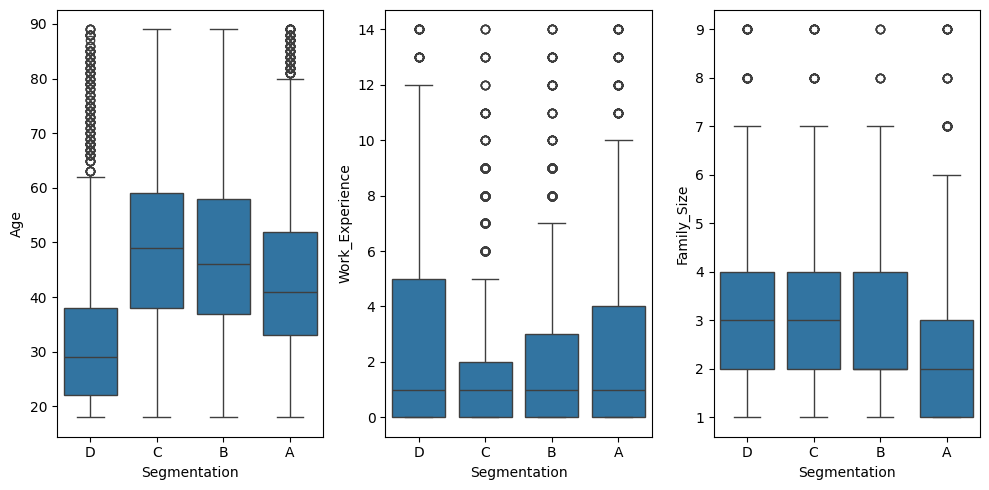

In [16]:
import seaborn as sns
label = ['D','C','B','A']
data_box = df_en_outliner.copy()
outliers_cols = ['Age', 'Work_Experience', 'Family_Size']

plt.figure(figsize=(10,5))
for i, col in enumerate (outliers_cols):
    plt.subplot(1, 3 ,i + 1)
    sns.boxplot(x = 'Segmentation', y = col, order = label, data = data_box)
    plt.tight_layout()
plt.show()

In [17]:
df_en_outliner = df_en_outliner.reset_index()
df_en_outliner

,index,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,8063,Male,No,22,No,Other,0.0,Low,7.0,Cat_1,D
8064,8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


Xử lí outlier bằng IQR Interquartile Range
- Xử lí thông qua tìm giới hạn trên và giới hạn dưới.
- Gán các dữ liệu nằm ngoài giới hạn trên (outliers) bằng trung vị (median) của các giá trị thỏa mãn không là outliers.

In [18]:
def outliers(data_frame, col):
    Q1 = data_frame[col].quantile(0.25)
    Q3 = data_frame[col].quantile(0.75)
    IQR = Q3 - Q1
    if col == 'Family_Size':
        lower = max(Q1 - IQR*1.5, 1)
    else:
        lower = max(Q1 - IQR*1.5, 0)
    upper = Q3 + IQR*1.5
    display(f"Lower = {lower}, Q3 = {upper}")

    isoutlier = (data_frame[col] < lower) | (data_frame[col] > upper)
    if col == 'Family_Size':
        res = data_frame.loc[~isoutlier, col].median()
        data_frame.loc[isoutlier, col] = round(res)
        display(f"Median = {round(res)}")
    else:
        data_frame.loc[isoutlier, col] = data_frame.loc[~isoutlier, col].median()
        display(f"Median = {data_frame.loc[~isoutlier, col].median()}")


In [19]:
for col in outliers_cols:
    df_en_outliner.set_index('Segmentation', inplace=True)
    for l in label:
        print(f'--------------{col}-{l}--------------')
        target = df_en_outliner.loc[l, col]
        target = pd.DataFrame(target)
        outliers(target, col)
        target = target.reset_index()
        df_en_outliner.loc[l,col] = target[col].values
    df_en_outliner = df_en_outliner.reset_index()
df_en_outliner = df_en_outliner.drop('index', axis=1)
df_en_outliner

--------------Age-D--------------


'Lower = 0, Q3 = 62.0'

'Median = 28.0'

--------------Age-C--------------


'Lower = 6.5, Q3 = 90.5'

'Median = 49.0'

--------------Age-B--------------


'Lower = 5.5, Q3 = 89.5'

'Median = 46.0'

--------------Age-A--------------


'Lower = 4.5, Q3 = 80.5'

'Median = 40.0'

--------------Work_Experience-D--------------


'Lower = 0, Q3 = 12.5'

'Median = 1.0'

--------------Work_Experience-C--------------


'Lower = 0, Q3 = 5.0'

'Median = 1.0'

--------------Work_Experience-B--------------


'Lower = 0, Q3 = 7.5'

'Median = 1.0'

--------------Work_Experience-A--------------


'Lower = 0, Q3 = 10.0'

'Median = 1.0'

--------------Family_Size-D--------------


'Lower = 1, Q3 = 7.0'

'Median = 3'

--------------Family_Size-C--------------


'Lower = 1, Q3 = 7.0'

'Median = 3'

--------------Family_Size-B--------------


'Lower = 1, Q3 = 7.0'

'Median = 2'

--------------Family_Size-A--------------


'Lower = 1, Q3 = 6.0'

'Median = 2'

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,D,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,A,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4
2,B,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,B,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,A,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,D,Male,No,22,No,Other,0.0,Low,7.0,Cat_1
8064,D,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,D,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,B,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


## Encoding


In [20]:
df_ord = df_en_outliner.copy()

In [21]:
display(df_ord[['Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score']].head())
print(df_ord.dtypes)

,Segmentation,Gender,Ever_Married,Graduated,Var_1,Spending_Score
0,D,Male,No,No,Cat_4,Low
1,A,Female,Yes,Yes,Cat_4,Average
2,B,Female,Yes,Yes,Cat_6,Low
3,B,Male,Yes,Yes,Cat_6,High
4,A,Female,Yes,Yes,Cat_6,High


Segmentation        object
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object


**Encoding bằng OrdinalEconder và TargetEncoder**
- Các features: 'Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score' - có thứ tự về value -> phù hợp với Ordinal Encoder.
- Feature 'Profession' có các giá trị (values) độc lập, rời rạc -> Phù hợp với Target Encoder - có thể giữ được mối quan hệ giữa Feature và Target (Segmentation).


In [22]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [23]:
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

Ord = OrdinalEncoder(categories=[['D','C','B','A'],['Male', 'Female'],['No','Yes'], ['No', 'Yes'], ['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],['Low', 'Average', 'High']])
df_ord = df_ord.astype(str)
columns = ['Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score']
df_ord[['Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score']] = Ord.fit_transform(
    df_en_outliner[['Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score']] )

Gen = ce.TargetEncoder()
df_en_ord = df_ord.copy()
df_en_ord[['Profession']] = Gen.fit_transform(df_en_ord[['Profession']], df_en_ord[['Segmentation']])

In [24]:
df_en_ord

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8063,0.0,0.0,0.0,22,0.0,1.298391,0.0,0.0,7.0,0.0
8064,0.0,0.0,0.0,35,0.0,1.529215,3.0,0.0,4.0,3.0
8065,0.0,1.0,0.0,33,1.0,0.500000,1.0,0.0,1.0,5.0
8066,2.0,1.0,0.0,27,1.0,0.500000,1.0,0.0,4.0,5.0


## Scaling


In [25]:
df_scaling = df_en_ord.copy()

In [26]:
df_scaling = df_scaling.astype(float)
df_scaling['Family_Size'] = df_scaling['Family_Size'].round()
df_scaling['Family_Size'].unique()
df_scaling['Work_Experience'] = df_scaling['Work_Experience'].round()
df_scaling['Work_Experience'].unique()

array([ 1.,  0.,  4.,  9.,  3.,  5.,  8.,  7.,  2.,  6., 11., 10., 12.])

Có 2 Phương pháp chuẩn hóa dữ liệu phổ biến là: Min-Max Scaling và StandardScaler

- Min-Max: Đưa dữ liệu về khoảng từ [0,1] do công thức {(X-Xmin)/(Xmax - Xmin)}
    + Ưu điểm: Dữ nguyên hình dạng phân bố gốc
    + Nhược điểm: Giới hạn trên một khoảng, không thể hiện rõ độ phân bố so với các biến khác, nhạy cảm với min - max
- StandardScaler:
    + Ưu điểm : Đưa các biến về cùng 1 vị trí trung bình và độ lệch chuẩn
    + Nhược điểm: Không giữ nguyên phân phối. Chỉ tối ưu với phân phối chuẩn, đối với các phân phối khác dễ dẫn đến việc xuất hiện nhiều điểm dữ liệu cách xa trung bình. Làm các phân phối có thứ tự hoặc nhị phân trở nên liên tục

Khi nào nên sử dụng
- Min-Max: Dữ liệu nằm trong 1 phạm vi nhất định
- Standard: Khi dữ liệu có phân phối chuẩn

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

minmax = MinMaxScaler()
cols = df_fill.columns[:-1]
df_minmax = df_scaling.copy()
df_minmax[cols] = minmax.fit_transform(df_scaling[cols])
df_minmax

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,0.0,0.0,0.056338,0.0,0.000000,0.083333,0.0,0.500000,0.500000
1,3.0,1.0,1.0,0.281690,1.0,0.987538,0.083333,0.5,0.333333,0.500000
2,2.0,1.0,1.0,0.690141,1.0,0.987538,0.083333,0.0,0.000000,0.833333
3,2.0,0.0,1.0,0.690141,1.0,0.925542,0.000000,1.0,0.166667,0.833333
4,3.0,1.0,1.0,0.309859,1.0,1.000000,0.083333,1.0,0.833333,0.833333
...,...,...,...,...,...,...,...,...,...,...
8063,0.0,0.0,0.0,0.056338,0.0,0.625918,0.000000,0.0,1.000000,0.000000
8064,0.0,0.0,0.0,0.239437,0.0,0.806878,0.250000,0.0,0.500000,0.500000
8065,0.0,1.0,0.0,0.211268,1.0,0.000000,0.083333,0.0,0.000000,0.833333
8066,2.0,1.0,0.0,0.126761,1.0,0.000000,0.083333,0.0,0.500000,0.833333


In [28]:
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
df_zscore = df_scaling.copy()
df_zscore[cols] = z_scaler.fit_transform(df_scaling[cols])
df_zscore

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,-0.909164,-1.190689,-1.293801,-1.29219,-2.081483,-0.324774,-0.736833,0.909036,-0.808370
1,3.0,1.099912,0.839850,-0.245362,0.77388,0.713697,-0.324774,0.612411,0.168068,-0.808370
2,2.0,1.099912,0.839850,1.654933,0.77388,0.713697,-0.324774,-0.736833,-1.313868,0.600711
3,2.0,-0.909164,0.839850,1.654933,0.77388,0.538221,-0.721124,1.961655,-0.572900,0.600711
4,3.0,1.099912,0.839850,-0.114308,0.77388,0.748972,-0.324774,1.961655,2.390972,0.600711
...,...,...,...,...,...,...,...,...,...,...
8063,0.0,-0.909164,-1.190689,-1.293801,-1.29219,-0.309851,-0.721124,-0.736833,3.131939,-2.921991
8064,0.0,-0.909164,-1.190689,-0.441945,-1.29219,0.202347,0.467927,-0.736833,0.909036,-0.808370
8065,0.0,1.099912,-1.190689,-0.573000,0.77388,-2.081483,-0.324774,-0.736833,-1.313868,0.600711
8066,2.0,1.099912,-1.190689,-0.966164,0.77388,-2.081483,-0.324774,-0.736833,0.909036,0.600711


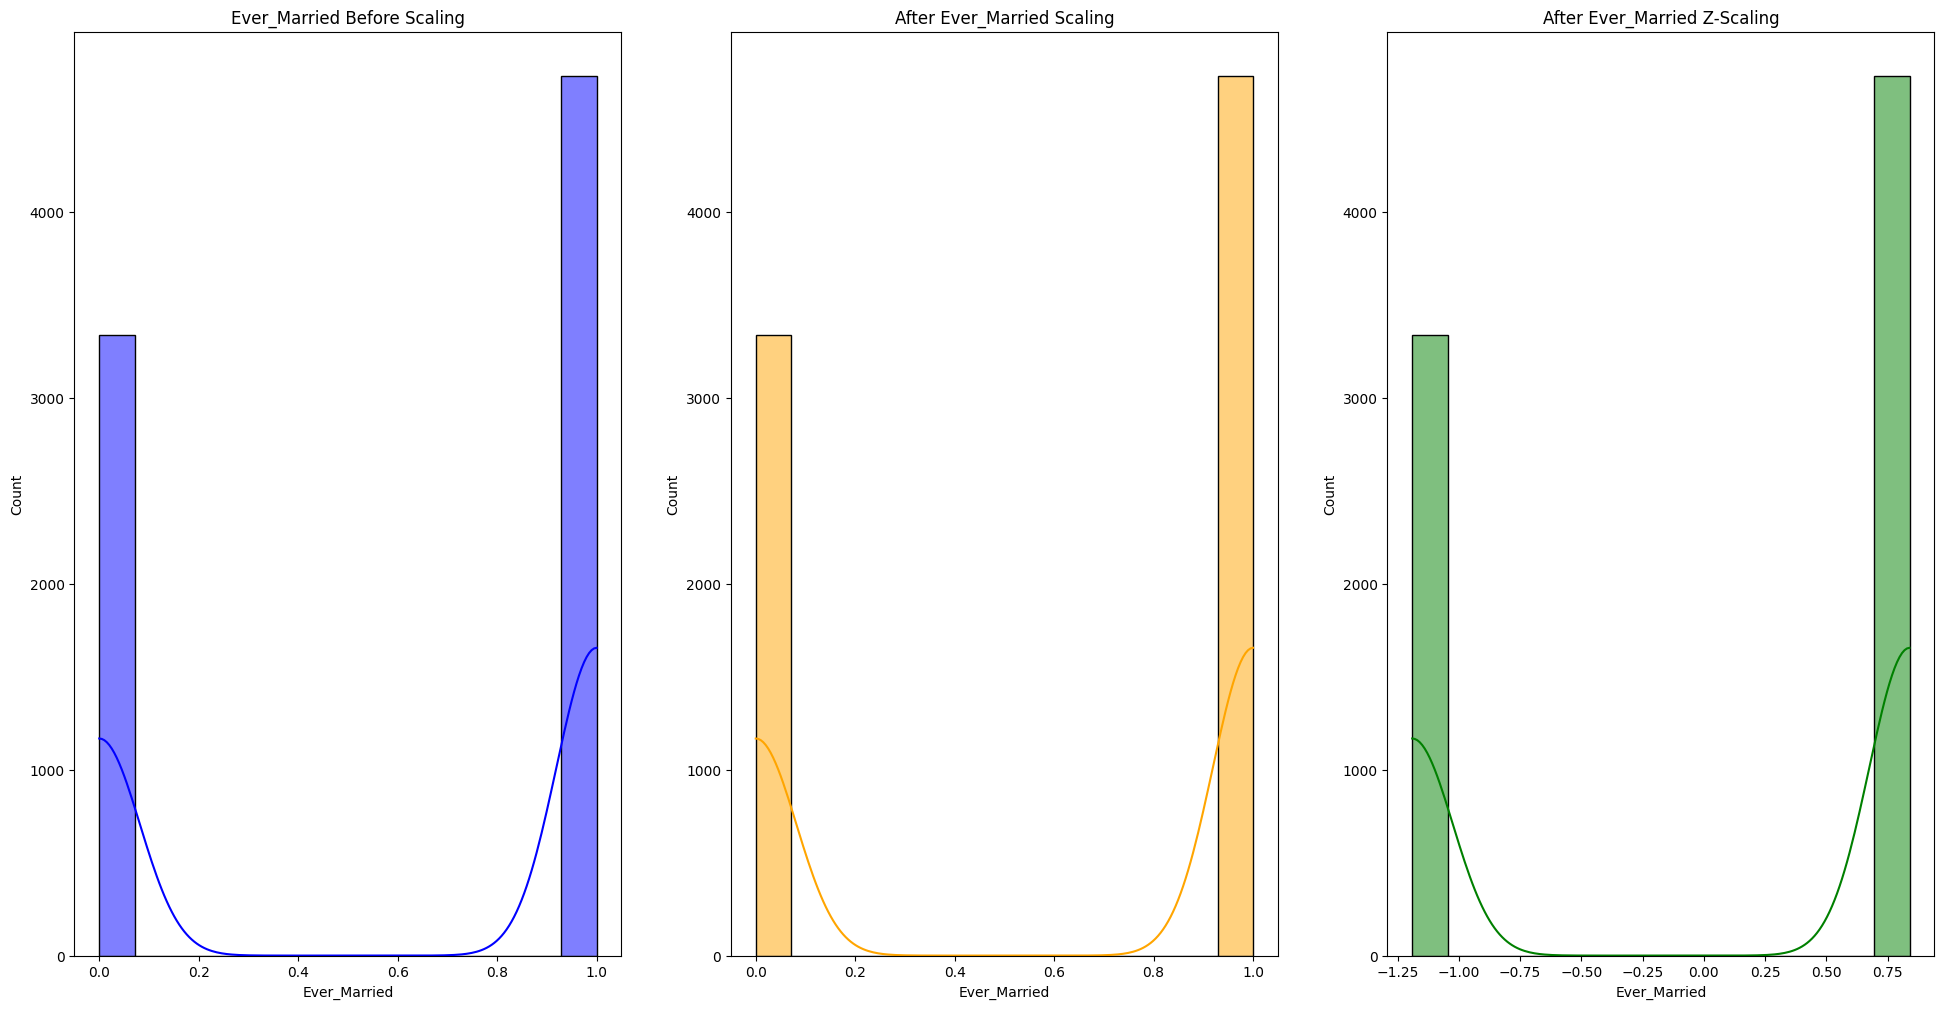

In [29]:
# Ever_Married, Age
plt.subplots(1, 3, figsize=(24, 12))
plt.subplot(1, 3, 1)
plt.title('Ever_Married Before Scaling')
sns.histplot(df_scaling['Ever_Married'], kde=True, color='blue')
plt.subplot(1, 3, 2)
plt.title(f'After Ever_Married Scaling')
sns.histplot(df_minmax['Ever_Married'], kde=True, color='orange')
plt.subplot(1, 3, 3)
plt.title(f'After Ever_Married Z-Scaling')
sns.histplot(df_zscore['Ever_Married'], kde=True, color='green')
plt.show()

Trong khi Min-Max Scaling vẫn giữ được tính phân biệt giữa các giá trị rời rạc (ví dụ 0 và 1), thì Standard Scaler (Z-Scaling) lại biến chúng thành các giá trị trong một dải liên tục, điều này có thể làm sai lệch bản chất rời rạc của biến và ảnh hưởng đến cách mô hình học và đánh giá mức độ quan trọng của biến đó.

Bởi vì:
- Min-Max Scaling với 0/1 thì vẫn ra 0 và 1, nên không thay đổi logic phân biệt của biến.

- Z-score chuẩn hóa sẽ dùng mean và std → kết quả là 0 sẽ thành một số âm, 1 thành số dương → tạo ra tính liên tục giả. Ngoài ra do biến rời rạc nên sẽ ảnh hưởng đến việc mean lệch khỏi trung tâm phân phối và không nằm ở 0 dẫn đến miền giá trị không còn ý nghĩa chung nữa

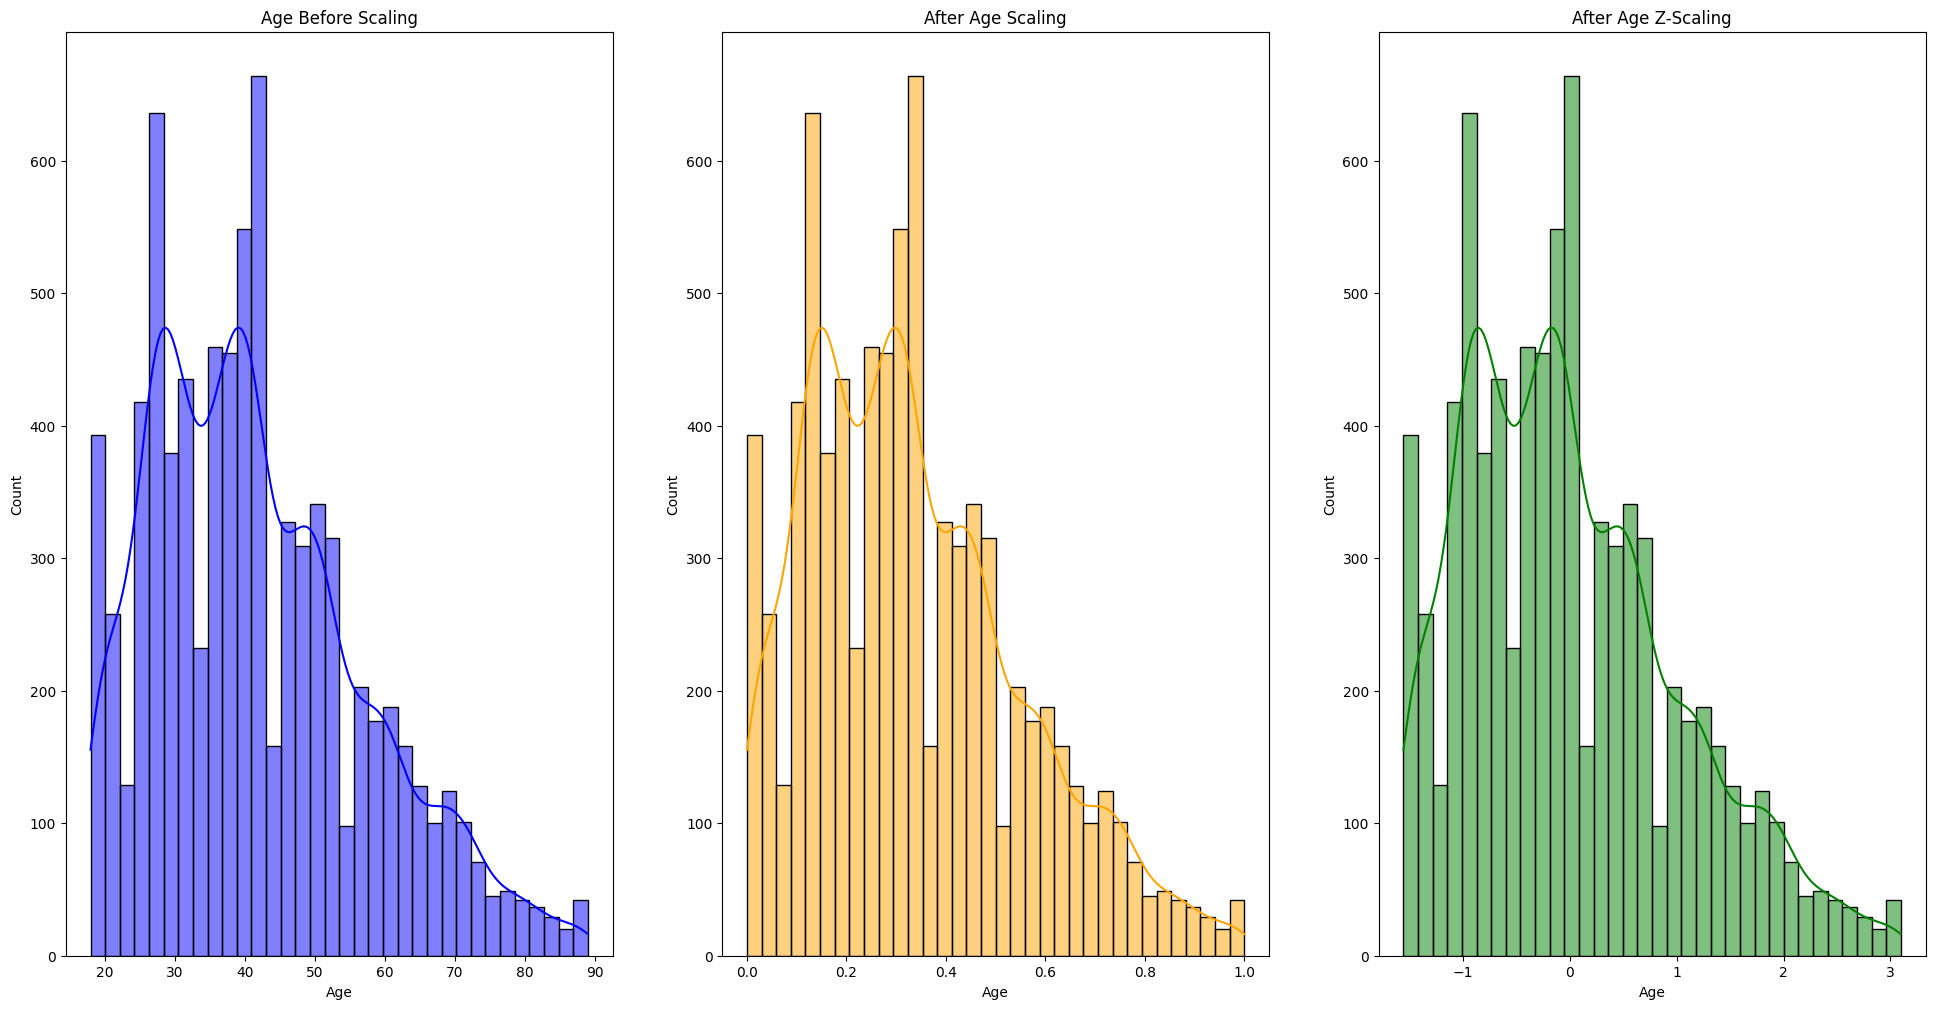

In [30]:
plt.subplots(1, 3, figsize=(24, 12))
plt.subplot(1, 3, 1)
plt.title('Age Before Scaling')
sns.histplot(df_scaling['Age'], kde=True, color='blue')
plt.subplot(1, 3, 2)
plt.title(f'After Age Scaling')
sns.histplot(df_minmax['Age'], kde=True, color='orange')
plt.subplot(1, 3, 3)
plt.title(f'After Age Z-Scaling')
sns.histplot(df_zscore['Age'], kde=True, color='green')
plt.show()

Phân phối không thay đổi gì nhiều

Với Min-Max: Dữ liệu được co dãn về khoảng [0, 1]

trong khi với Standard Scaler thì dữ liệu sẽ được đưa về với mean là 0. Tuy vậy phân phối vẫn bị lệch phải -> mean không còn đại diện tốt cho trung tâm dữ liệu vì dữ liệu không phân bố đều quanh 0

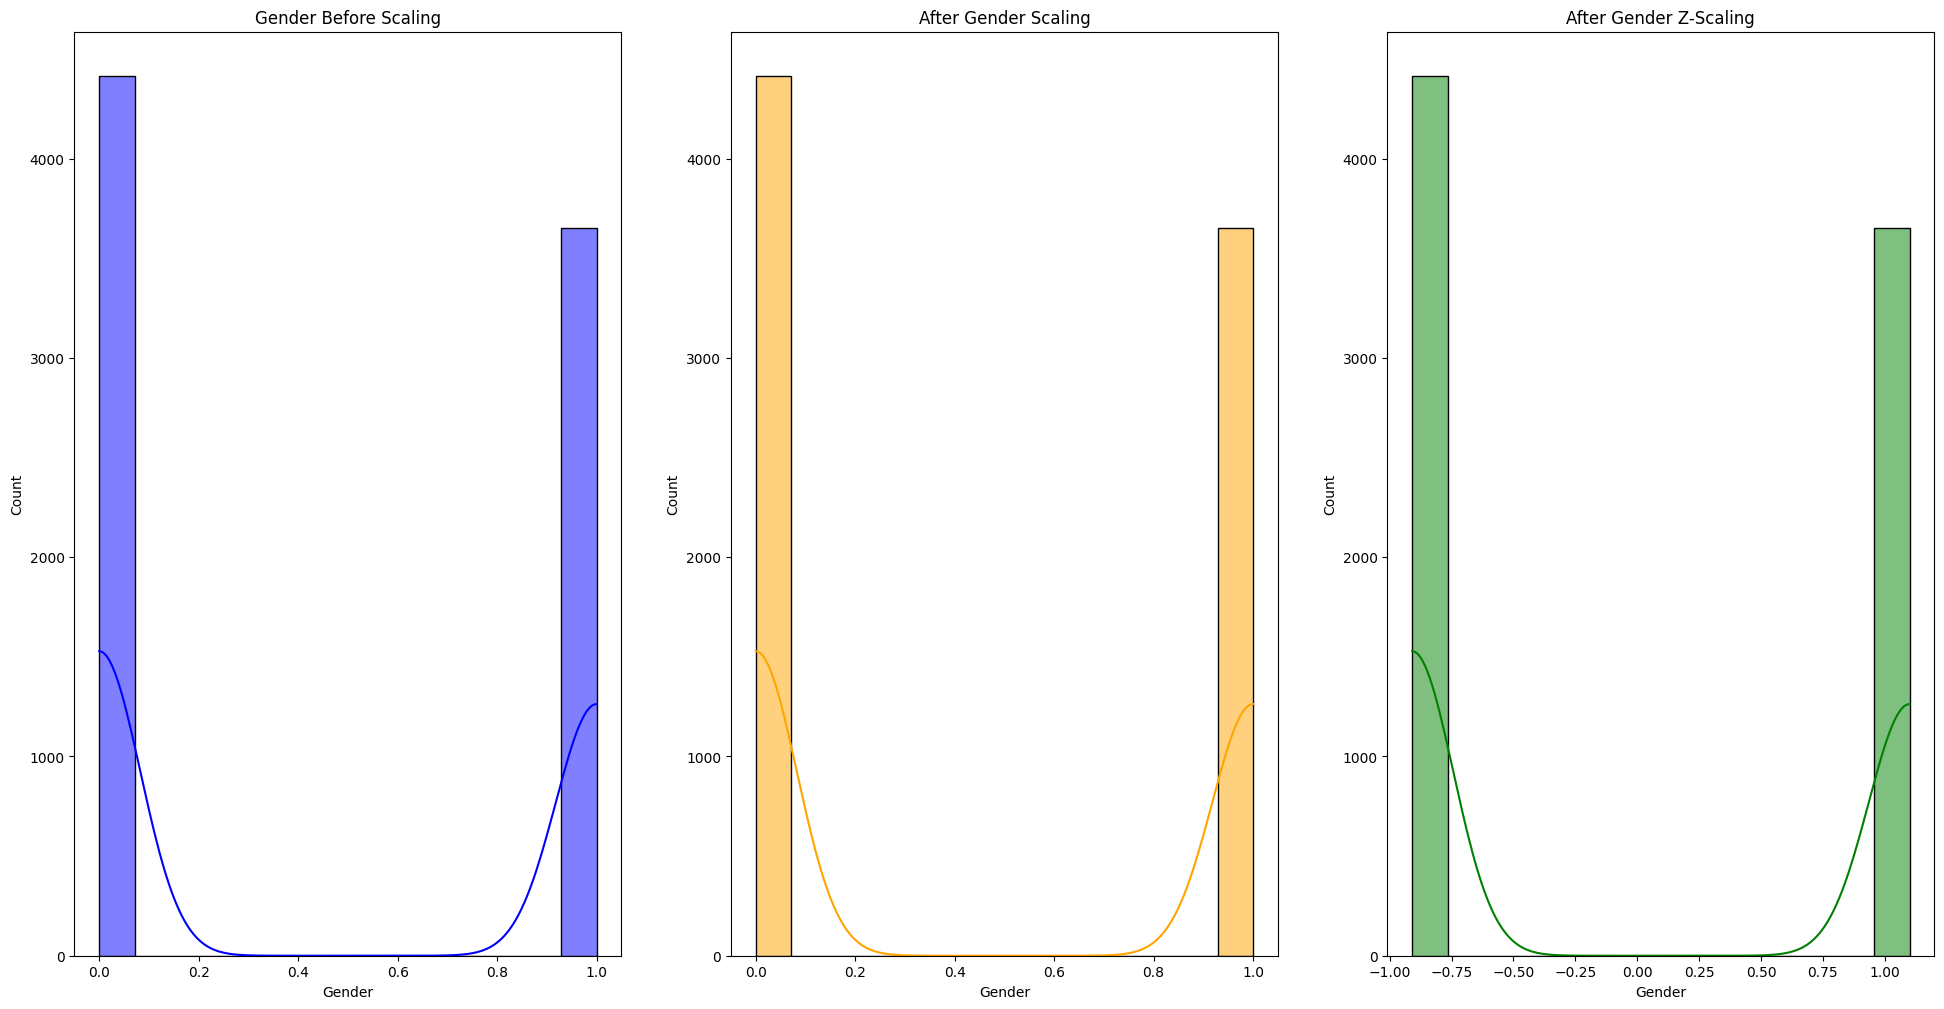

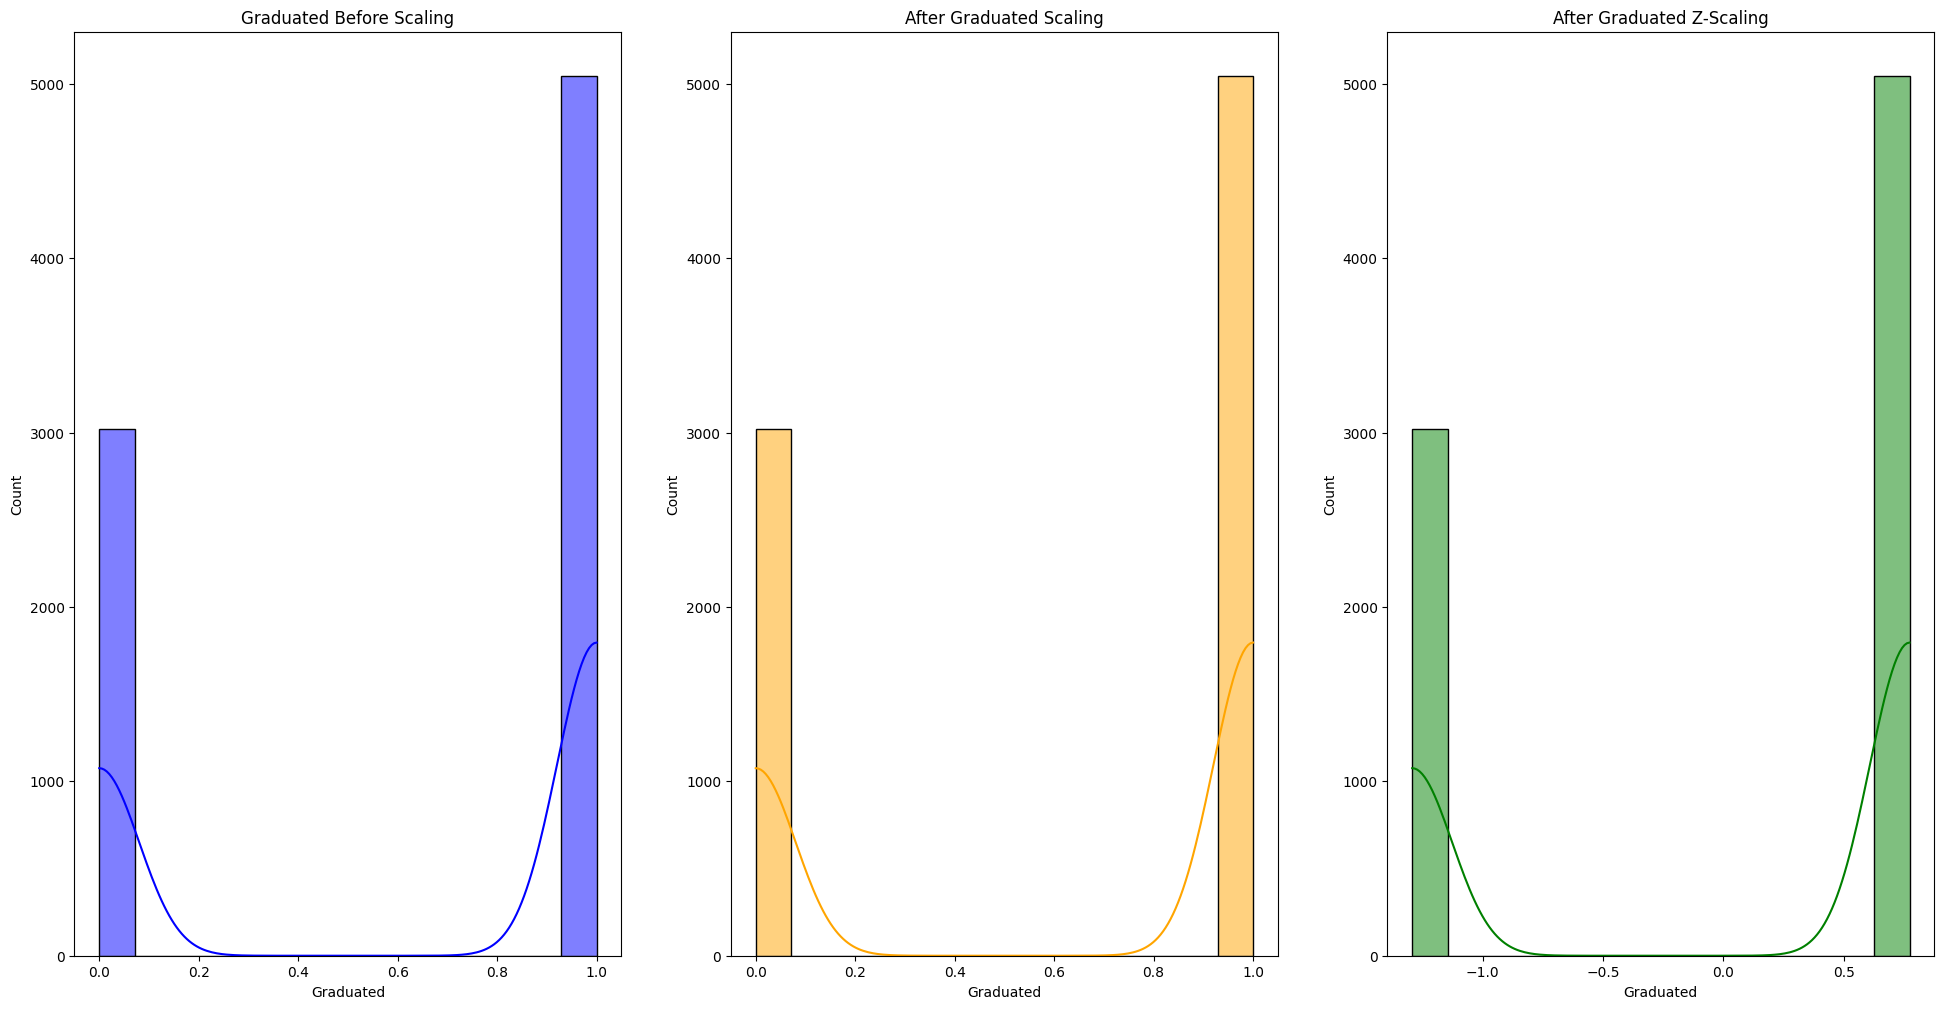

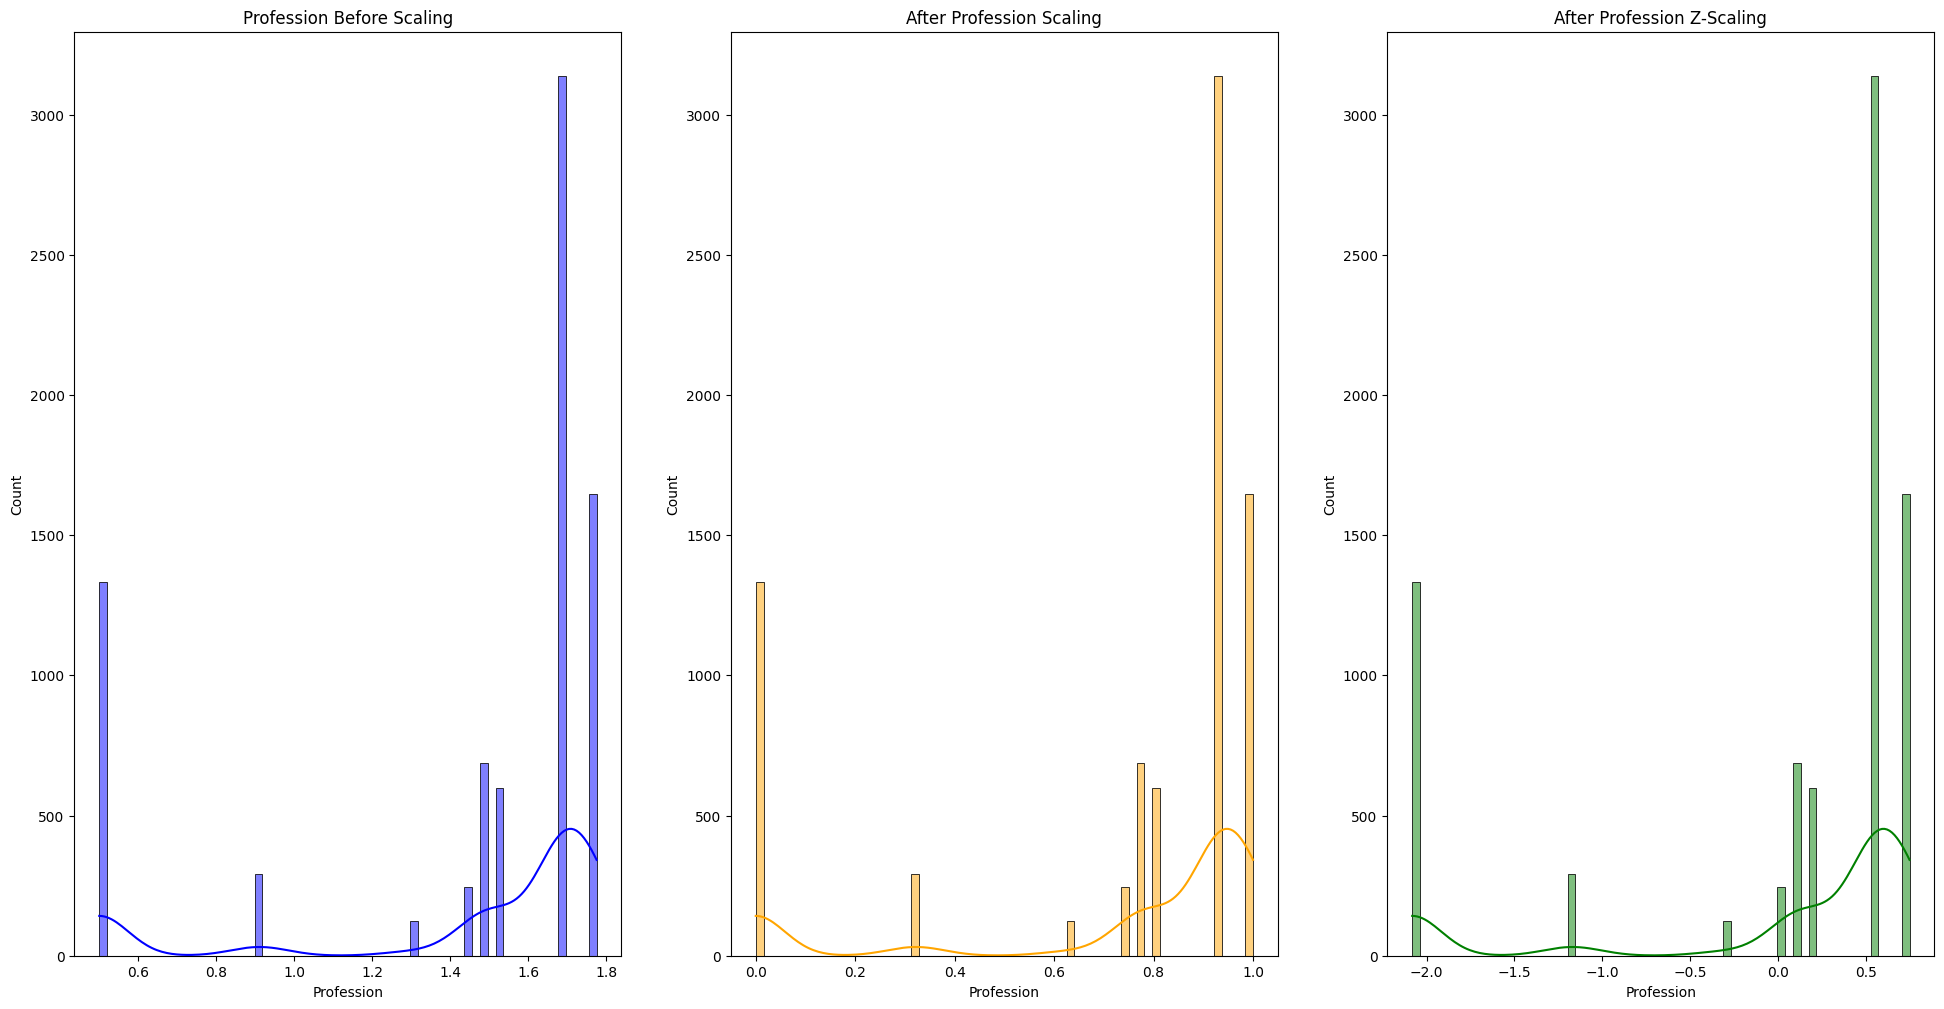

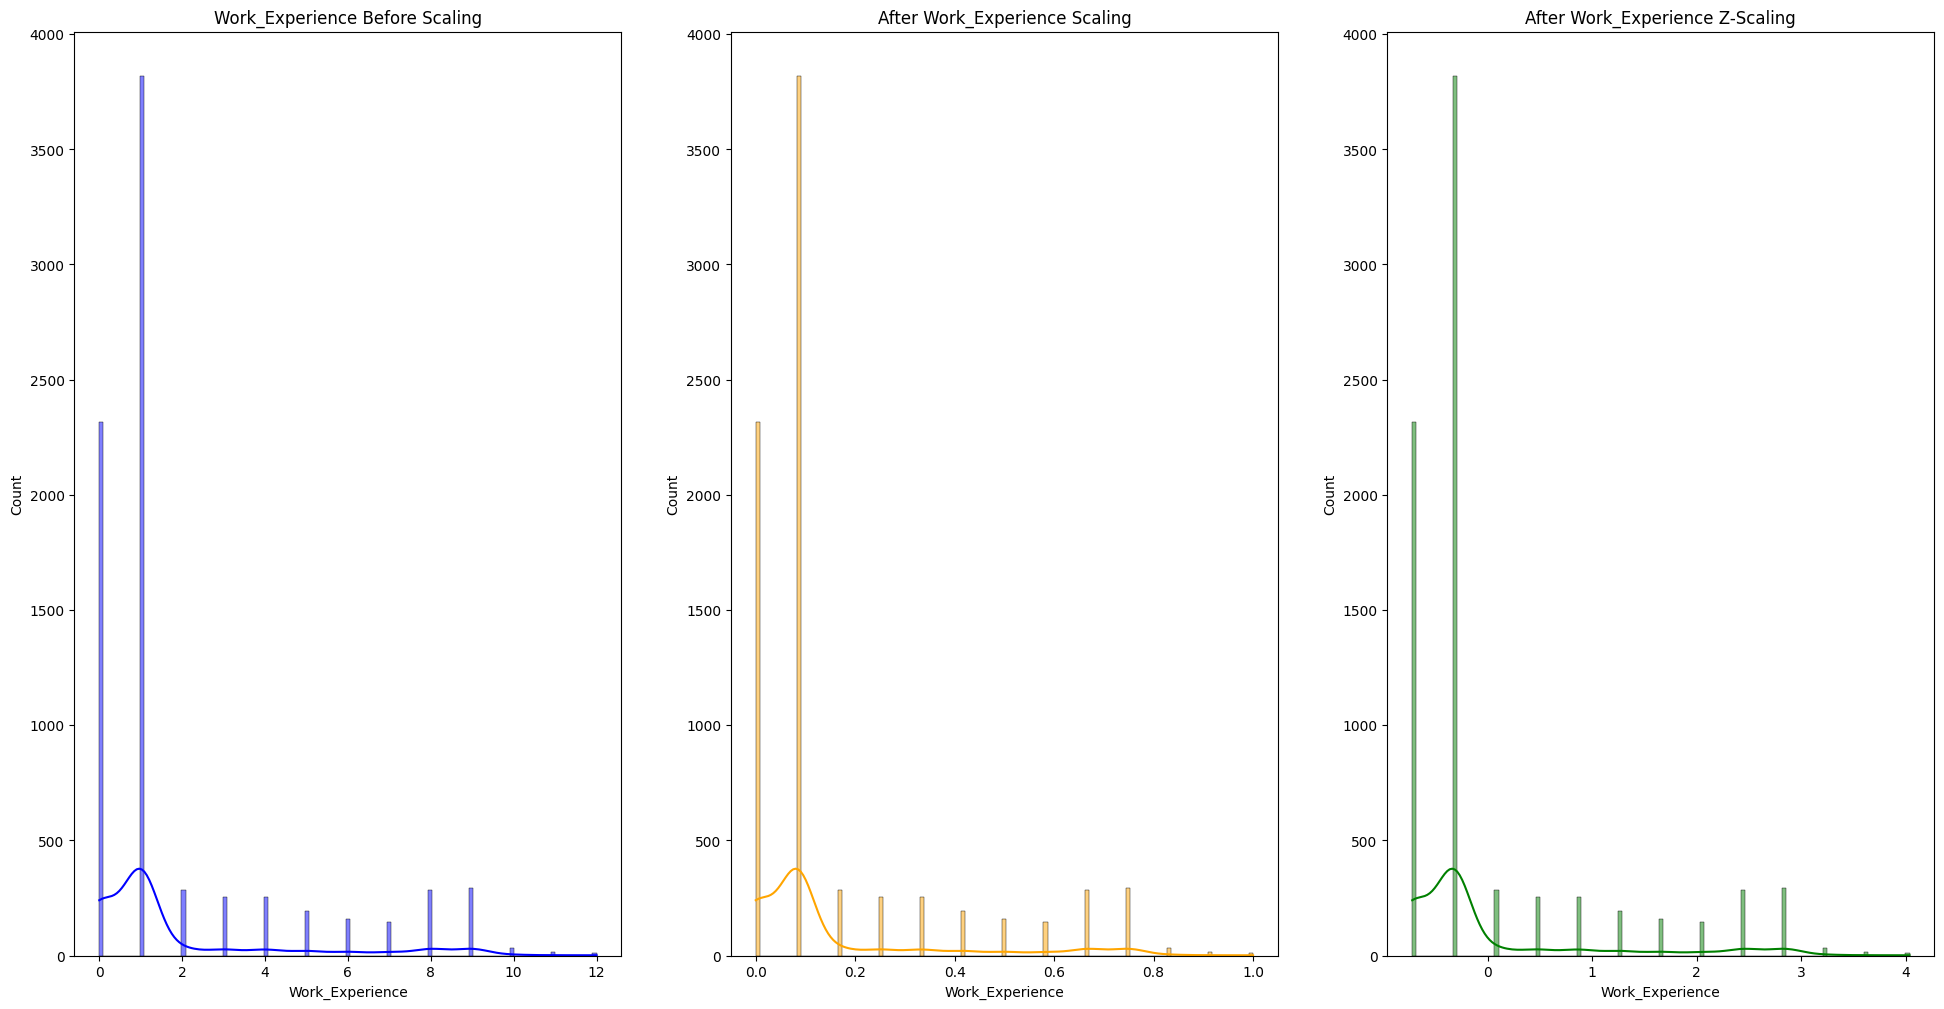

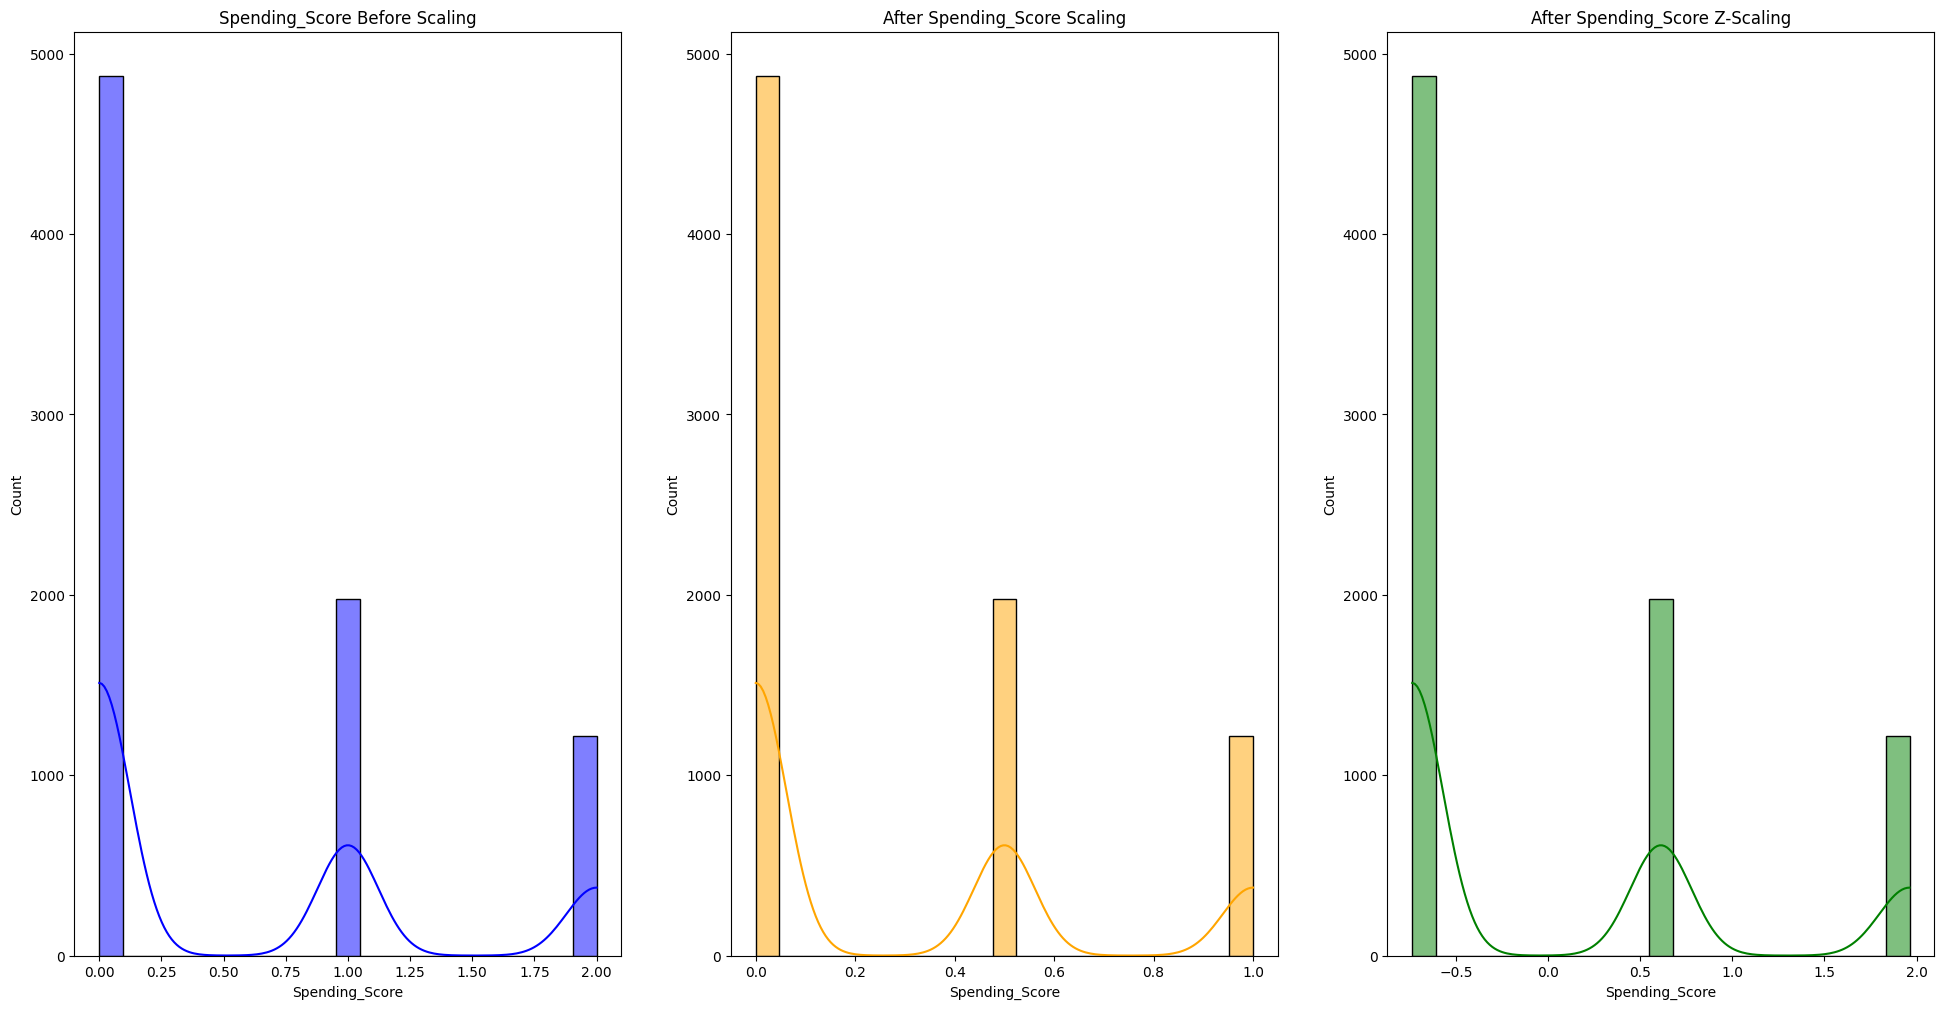

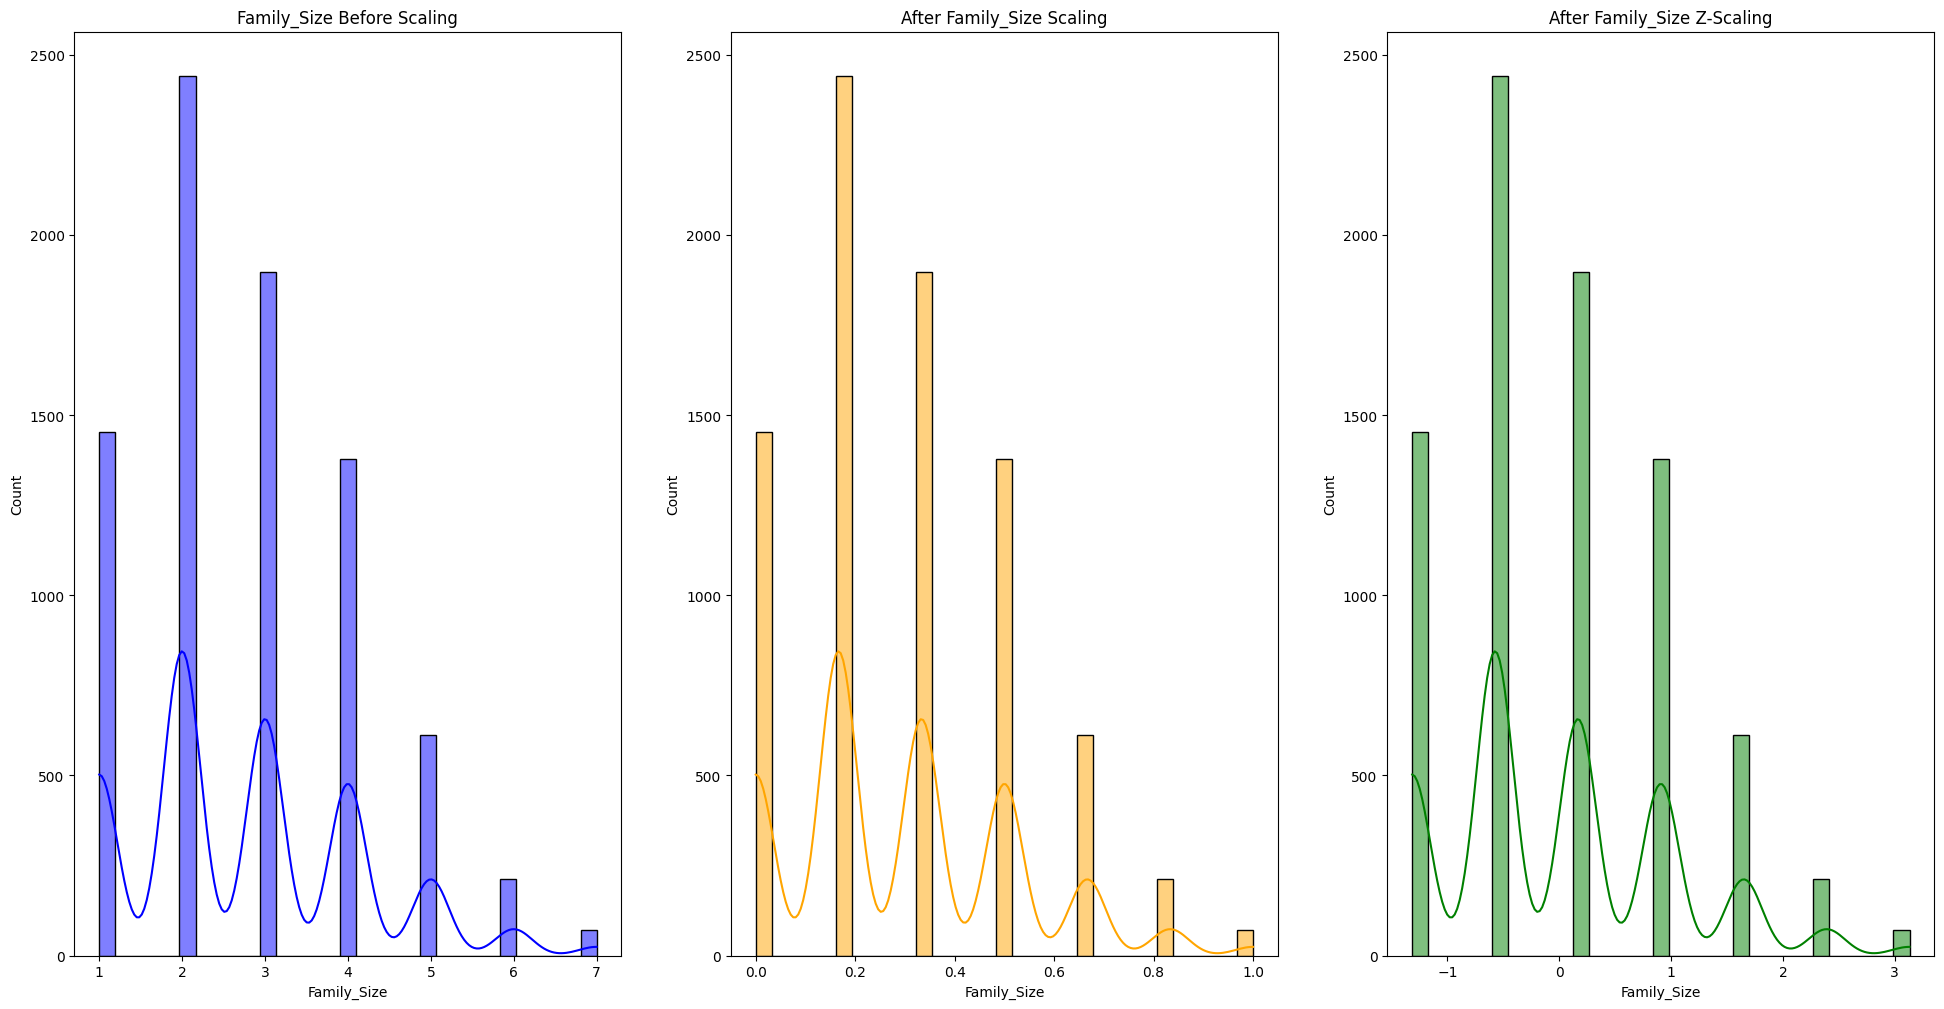

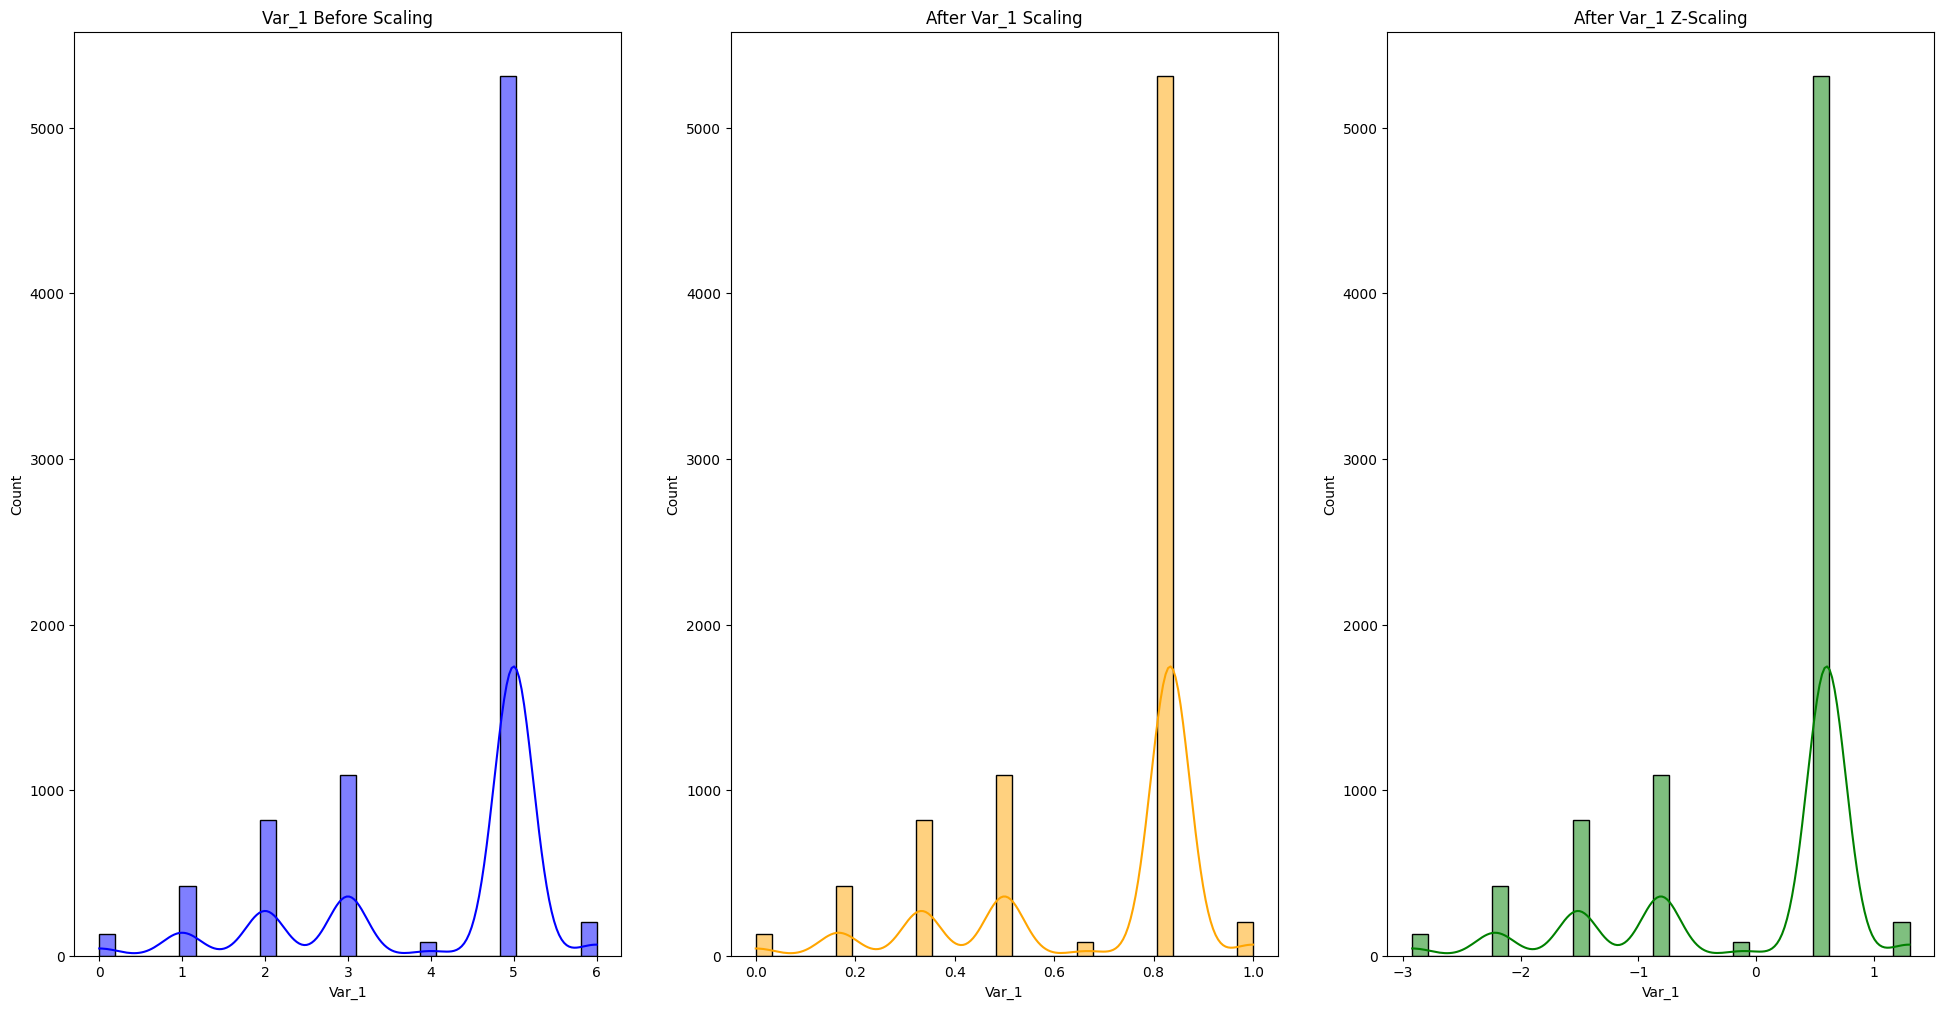

In [31]:
cols = cols.drop(['Ever_Married', 'Age'])

for col in cols:
    plt.subplots(1, 3, figsize=(24, 12))
    plt.subplot(1, 3, 1)
    plt.title(f'{col} Before Scaling')
    sns.histplot(df_scaling[col], kde=True, color='blue')
    plt.subplot(1, 3, 2)
    plt.title(f'After {col} Scaling')
    sns.histplot(df_minmax[col], kde=True, color='orange')
    plt.subplot(1, 3, 3)
    plt.title(f'After {col} Z-Scaling')
    sns.histplot(df_zscore[col], kde=True, color='green')
    plt.show()

Tương Tự với các feature còn lại

Vậy có thể thấy sử dụng Min-Max trong tập dữ liệu này sẽ phù hợp hơn so với sử dụng Standard Scaler

# 4. Xử lý đặc trưng - Features Engineering

In [32]:
df_feat_en = df_minmax.copy()
df_feat_en.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,0.0,0.0,0.056338,0.0,0.000000,0.083333,0.0,0.500000,0.500000
1,3.0,1.0,1.0,0.281690,1.0,0.987538,0.083333,0.5,0.333333,0.500000
2,2.0,1.0,1.0,0.690141,1.0,0.987538,0.083333,0.0,0.000000,0.833333
3,2.0,0.0,1.0,0.690141,1.0,0.925542,0.000000,1.0,0.166667,0.833333
4,3.0,1.0,1.0,0.309859,1.0,1.000000,0.083333,1.0,0.833333,0.833333


## 4.1. Thêm feature Has_Kid

Thêm cột Has_kid - Khách hàng đó có con hay chưa (Binary) .Nếu Family_Size >2 và Married = 1 thì Has_Kid = 1, ngược lại thì bằng 0. (Xu hướng chung những gia đình sẽ sống riêng). Những khách hàng có con sẽ bị ảnh hưởng tới việc mua xe nhiều hơn, vì nhu cầu chăm sóc con cái, sự an toàn trong việc đi lại và có được không gian vận chuyển đồ rộng rãi.

In [33]:
df_has_kid = df_en_ord.copy()
df_has_kid.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0


In [34]:
df_has_kid['Has_Kid'] = (df_has_kid['Family_Size'].astype(float) > 2) & (df_has_kid['Ever_Married'] == 1)
df_has_kid['Has_Kid'] = df_has_kid['Has_Kid'].astype(int)
df_has_kid.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Has_Kid
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0,0
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0,1
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0,0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0,0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0,1


Kiểm tra feature có thật sự quan trọng hay không?

In [35]:
from re import VERBOSE
# Cài đặt mô hình và so sánh
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

model = LGBMClassifier(objective='multiclass', num_class=3, random_state=42, verbose=-1)

# Base model với bộ feature ban đầu
df_all_features = df_has_kid.drop(columns='Segmentation')
y = df_has_kid['Segmentation']

minmax = MinMaxScaler()
X_before = minmax.fit_transform(df_all_features)
X_after = minmax.fit_transform(df_all_features.drop(columns='Has_Kid'))

score_before = cross_val_score(model, X_before, df_has_kid['Segmentation'], cv=5, scoring='f1_macro').mean()
score_after = cross_val_score(model, X_after, df_has_kid['Segmentation'], cv=5, scoring='f1_macro').mean()

Sử dụng XgBoost để tính toán và so sánh độ quan trọng cùa feature mới, lí do:

- GBoost rất hiệu quả khi xử lý bộ dữ liệu lớn và phức tạp. Trong các bài toán phân loại nhiều lớp (multiclass), nó có thể học từ các mẫu dữ liệu phức tạp với nhiều lớp và giúp mô hình cải thiện khả năng phân loại.
- Thông qua XGBoost có thể gián tiếp sử dụng giá trị của AUC để so sánh độ chính xác của mô hình trước và sau khi thêm feature mới

In [36]:
print(f"AUC macro have feature Has_Kid:", score_before)
print(f"AUC macro without feature Has_Kid:", score_after)

AUC macro have feature Has_Kid: 0.5526432112281853
AUC macro without feature Has_Kid: 0.5479333372593065


Theo như kết quả ta thấy giá trị AUC trước và sau có feature Has_Kid có sự thay đổi tích cực về Score, nên ta quyết định giữ lại feature này

## 4.2. Thêm feature Age_Teen

In [37]:
df_group_age = df_has_kid.copy()
df_group_age.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Has_Kid
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0,0
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0,1
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0,0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0,0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0,1


<Axes: xlabel='Age', ylabel='Count'>

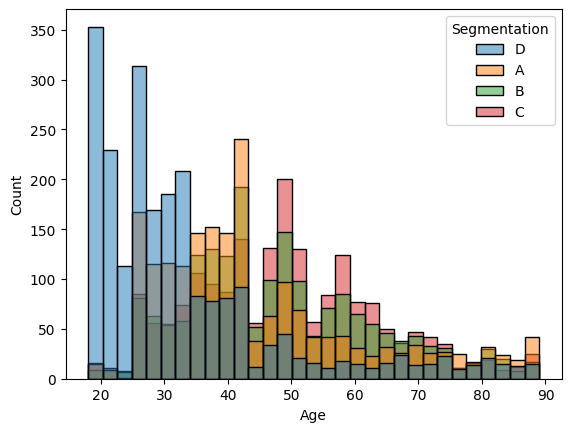

In [38]:
sns.histplot(x=df['Age'], hue=df['Segmentation'])

Phân khúc khách hàng D chiếm ưu thế ở độ tuổi từ 18 đến 25, nên ta quyết định thêm cột Age_Teen với giá trị 0 và 1 để kiểm tra xem khách hàng đó có ở độ tuổi trẻ hay không

In [39]:
df_group_age['Age_Teen'] = (df_group_age['Age'].astype(float) <= 26).astype(int)
df_group_age.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Has_Kid,Age_Teen
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0,0,1
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0,1,0
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0,0,0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0,0,0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0,1,0


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [41]:
df_cft = df_group_age.copy()
minmax = MinMaxScaler()
df_cft.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Has_Kid,Age_Teen
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0,0,1
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0,1,0
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0,0,0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0,0,0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0,1,0


In [42]:
GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth = 4, random_state= 42, subsample=1.0, loss='log_loss' )
test_cft = df_cft['Segmentation']

GradientBoostingClassifier:
- Tập hợp nhiều Decision trees
- Mô hình mới sẽ được học để sửa lỗi của các mô hình trước đó theo hướng làm giảm hàm mất mát (loss function)
=> Phù hợp với ít data

Kiểm tra bằng GradientBoostingClassifier

In [43]:
def accuracy_gbc(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    return accuracy

In [44]:
train_cft_age_teen = minmax.fit_transform(df_cft.drop(['Segmentation', 'Age'], axis=1))
train_cft_age = minmax.fit_transform(df_cft.drop(['Segmentation', 'Age_Teen'], axis=1))
train_cft_all = minmax.fit_transform(df_cft.drop(['Segmentation'], axis=1))

print(f"Accuracy with Age_Teen: {accuracy_gbc(train_cft_age_teen, test_cft, GBC)}")
print(f"Accuracy with Age: {accuracy_gbc(train_cft_age, test_cft, GBC)}")
print(f"Accuracy with all features: {accuracy_gbc(train_cft_all, test_cft, GBC)}")

Accuracy with Age_Teen: 0.5218145761031234
Accuracy with Age: 0.5699058006941001
Accuracy with all features: 0.570153693604363


In [45]:
df_cft.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Has_Kid,Age_Teen
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0,0,1
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0,1,0
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0,0,0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0,0,0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0,1,0


Nhìn chung chỉ số accurancy ở cả ba trường hợp đều ngang nhau nhưng việc lấy cả hai features sẽ nhỉnh hơn đôi chúc.

## 4.3. Nhóm feature Ever_Married và Spending_Score

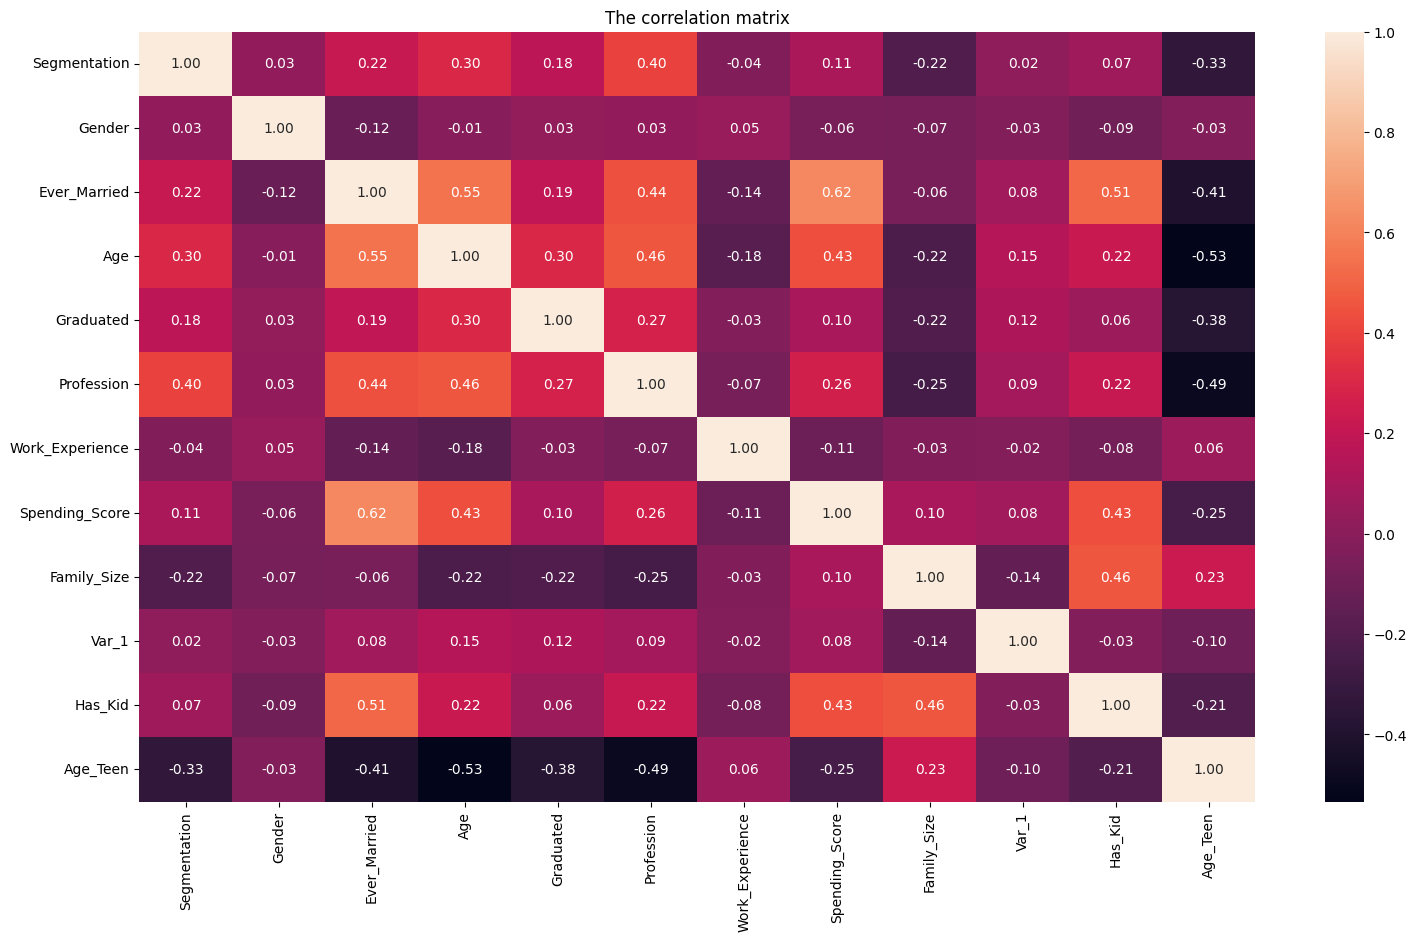

In [46]:
cor = df_cft.corr()

plt.figure(figsize = (18, 10))
sns.heatmap(cor, annot = True, fmt='.2f')
plt.title('The correlation matrix')
plt.show()

Thêm feature Married_Spending với giá trị là tích của Married và Spending_Score vì 2 cột này có độ tương quan khá cao 0.62

In [47]:
df_gr_ma_sp = df_cft.copy()
df_gr_ma_sp.head()

,Segmentation,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Has_Kid,Age_Teen
0,0.0,0.0,0.0,22,0.0,0.500000,1.0,0.0,4.0,3.0,0,1
1,3.0,1.0,1.0,38,1.0,1.759657,1.0,1.0,3.0,3.0,1,0
2,2.0,1.0,1.0,67,1.0,1.759657,1.0,0.0,1.0,5.0,0,0
3,2.0,0.0,1.0,67,1.0,1.680578,0.0,2.0,2.0,5.0,0,0
4,3.0,1.0,1.0,40,1.0,1.775553,1.0,2.0,6.0,5.0,1,0


So sánh mức độ quan trọng giữa 3 feaeture Ever_Married, Spending_Score và Married_Spending bằng cách sử dụng GradientBoostingClassifier


In [48]:
Married_Spending = df_gr_ma_sp['Ever_Married'] * df_gr_ma_sp['Spending_Score']
Married_Spending = pd.DataFrame(Married_Spending)
Married_Spending.rename(columns={0:'Married_Spending'}, inplace=True)
Married_Spending = minmax.fit_transform(Married_Spending)
Married_Spending = pd.DataFrame(Married_Spending)
Married_Spending.rename(columns={0:'Married_Spending'}, inplace=True)
Married_Spending.head()

,Married_Spending
0,0.0
1,0.5
2,0.0
3,1.0
4,1.0


Chay model và so sánh

In [49]:
train_cft_drop_ever_married = df_gr_ma_sp.drop(['Segmentation','Ever_Married'], axis=1) # train_cft_drop_ever_married
train_cft_drop_spending_score = df_gr_ma_sp.drop(['Segmentation','Spending_Score'], axis=1) # train_cft_drop_spending_score

train_cft_drop_ever_married_spending_score = df_gr_ma_sp.drop(['Segmentation','Spending_Score', 'Ever_Married'], axis=1) # train_cft_drop_ever_married_spending_score
train_cft_drop_ever_married_spending_score = pd.concat([train_cft_drop_ever_married_spending_score, Married_Spending], axis=1)

print(f"Accuracy with drop Ever_Married: {accuracy_gbc(train_cft_drop_ever_married, test_cft, GBC)}")
print(f"Accuracy with drop Spending_Score: {accuracy_gbc(train_cft_drop_spending_score, test_cft, GBC)}")
print(f"Accuracy with drop Ever_Married and Spending_Score: {accuracy_gbc(train_cft_drop_ever_married_spending_score, test_cft, GBC)}")

Accuracy with drop Ever_Married: 0.5619732275656916
Accuracy with drop Spending_Score: 0.5547843331680714
Accuracy with drop Ever_Married and Spending_Score: 0.5617253346554288


Nhận thấy rằng việc loại bỏ Ever_Married và Spending_Score thì accurancy xấp xỉ cao hơn nên chúng ta sẽ loại bỏ cả hai cột này để làm giảm số lượng cột nhằm cho mô hình học tốt hơn

In [50]:
df_gr_ma_sp = df_gr_ma_sp.drop(['Ever_Married', 'Spending_Score'], axis=1)
df_gr_ma_sp = pd.concat([df_gr_ma_sp, Married_Spending], axis=1)

In [51]:
df_feat_en = df_gr_ma_sp.copy()
df_feat_en = df_feat_en.apply(pd.to_numeric, errors='coerce')
df_feat_en.head()

,Segmentation,Gender,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Has_Kid,Age_Teen,Married_Spending
0,0.0,0.0,22,0.0,0.500000,1.0,4.0,3.0,0,1,0.0
1,3.0,1.0,38,1.0,1.759657,1.0,3.0,3.0,1,0,0.5
2,2.0,1.0,67,1.0,1.759657,1.0,1.0,5.0,0,0,0.0
3,2.0,0.0,67,1.0,1.680578,0.0,2.0,5.0,0,0,1.0
4,3.0,1.0,40,1.0,1.775553,1.0,6.0,5.0,1,0,1.0


## 4.4. Embedded Feature Selection với XGBoost

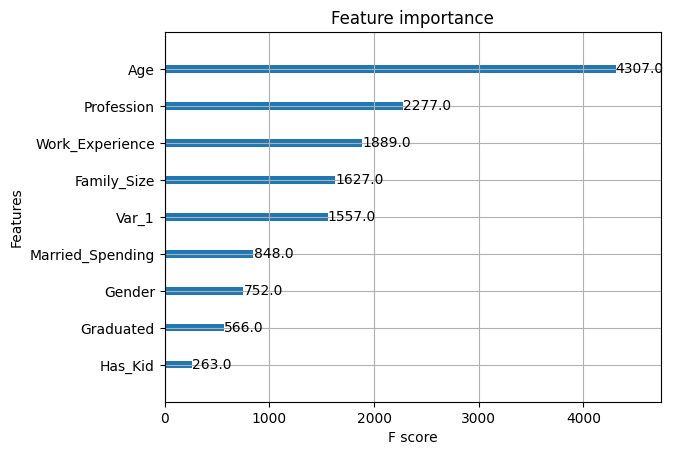

In [52]:
import xgboost as xgb

X = df_feat_en.drop('Segmentation', axis=1)
y = df_feat_en['Segmentation']

dtrain = xgb.DMatrix(X, label=y)

params = {
    'objective': 'multi:softprob',
    'num_class': len(set(y)),
    'eval_metric': 'mlogloss'
}

bst = xgb.train(params, dtrain, num_boost_round=100)

xgb.plot_importance(bst)
plt.show()


## 4.5. Scaling lại dữ liệu

In [ ]:
cols = df_feat_en.columns[1:]
df_feat_en[cols] = minmax.fit_transform(df_feat_en[cols])
df_feat_en.head()

,Segmentation,Gender,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Has_Kid,Age_Teen,Married_Spending
0,0.0,0.0,0.056338,0.0,0.000000,0.083333,0.500000,0.500000,0.0,1.0,0.0
1,3.0,1.0,0.281690,1.0,0.987538,0.083333,0.333333,0.500000,1.0,0.0,0.5
2,2.0,1.0,0.690141,1.0,0.987538,0.083333,0.000000,0.833333,0.0,0.0,0.0
3,2.0,0.0,0.690141,1.0,0.925542,0.000000,0.166667,0.833333,0.0,0.0,1.0
4,3.0,1.0,0.309859,1.0,1.000000,0.083333,0.833333,0.833333,1.0,0.0,1.0


# 5. Xây dựng mô hình

In [ ]:
df_model = df_feat_en.copy()
df_model.head()

,Segmentation,Gender,Age,Graduated,Profession,Work_Experience,Family_Size,Var_1,Has_Kid,Age_Teen,Married_Spending
0,0.0,0.0,0.056338,0.0,0.000000,0.083333,0.500000,0.500000,0.0,1.0,0.0
1,3.0,1.0,0.281690,1.0,0.987538,0.083333,0.333333,0.500000,1.0,0.0,0.5
2,2.0,1.0,0.690141,1.0,0.987538,0.083333,0.000000,0.833333,0.0,0.0,0.0
3,2.0,0.0,0.690141,1.0,0.925542,0.000000,0.166667,0.833333,0.0,0.0,1.0
4,3.0,1.0,0.309859,1.0,1.000000,0.083333,0.833333,0.833333,1.0,0.0,1.0


## 5.1. Lựa chọn và thử nghiệm mô hình

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neural_network import MLPClassifier # Neural Network
from xgboost import XGBClassifier # XGBoost
from lightgbm import LGBMClassifier # LightGBM
from sklearn.metrics import classification_report, confusion_matrix

X = df_model.drop('Segmentation', axis=1)
y = df_model['Segmentation']

def report_train(model, model_name, X, y):
  model.fit(X, y)

  score = model.score(X, y)
  print(f"Accuracy {model_name}: {score}")

  y_pred = model.predict(X)

  print(classification_report(y, y_pred))

  # Vẽ confusion matrix
  plt.figure(figsize=(10, 6))
  sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=0.5)
  plt.title(f"Confusion Matrix {model_name}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.tight_layout()
  plt.show()

  return score

### Logistic Regression

Logistic Regression là môt hình phân loại đơn giản, baseline rất mạnh, hoạt động tốt nếu dữ liệu tuyến tính hoặc gần tuyến tính.

Accuracy Logistic Regression: 0.5035944471988101
              precision    recall  f1-score   support

         0.0       0.65      0.73      0.69      2268
         1.0       0.47      0.59      0.53      1970
         2.0       0.36      0.19      0.25      1858
         3.0       0.42      0.45      0.44      1972

    accuracy                           0.50      8068
   macro avg       0.48      0.49      0.48      8068
weighted avg       0.49      0.50      0.49      8068



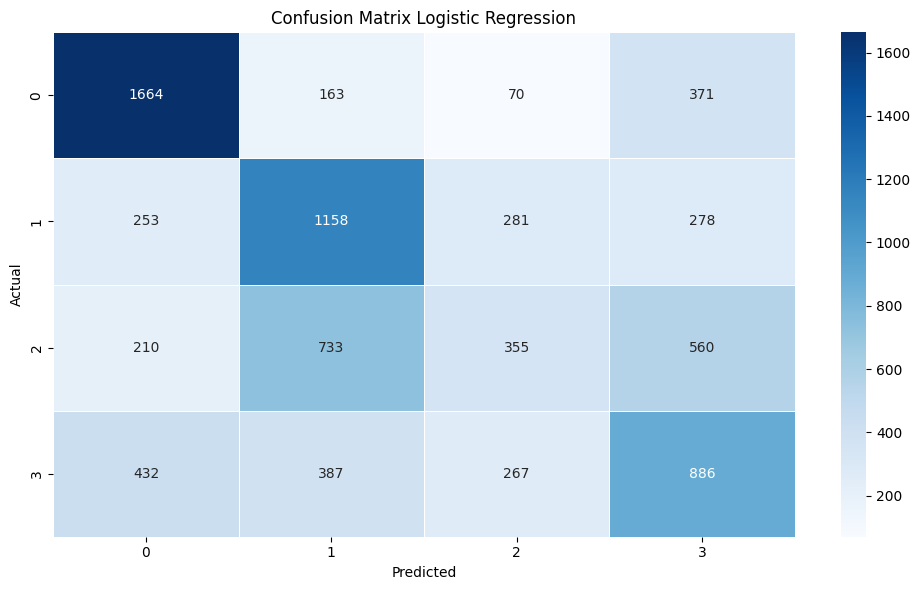

In [ ]:
lgr = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lgr_score = report_train(lgr, 'Logistic Regression', X, y)

Lớp 0:
Dự đoán đúng: 1660

Nhầm sang lớp 1: 174 | lớp 2: 66 | lớp 3: 368

→ Tỷ lệ đúng cao, nhưng có nhầm lẫn sang lớp 3 khá nhiều.

Lớp 1:
Dự đoán đúng: 1218

Nhầm sang lớp 0: 252 | lớp 2: 215 | lớp 3: 285

→ Vẫn dự đoán tốt, nhưng có sự nhầm lẫn tương đối mạnh sang tất cả các lớp khác, nhất là lớp 3.

Lớp 2:
Dự đoán đúng: 340

Nhầm sang lớp 0: 211 | lớp 1: 742 | lớp 3: 565

→ Mô hình khó phân biệt lớp 2 → bị nhầm nhiều nhất sang lớp 1.

Lớp 3:
Dự đoán đúng: 894

Nhầm sang lớp 0: 426 | lớp 1: 398 | lớp 2: 254

→ Mức độ nhầm lẫn cao, đặc biệt là với lớp 0 và 1.



### Random Forest

Random Forest phù hợp cho dữ liệu đa dạng features có mối quan hệ phi tuyến, không cần scaling.

Accuracy Random Forest: 0.937902825979177
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      2268
         1.0       0.90      0.94      0.92      1970
         2.0       0.92      0.90      0.91      1858
         3.0       0.95      0.93      0.94      1972

    accuracy                           0.94      8068
   macro avg       0.94      0.94      0.94      8068
weighted avg       0.94      0.94      0.94      8068



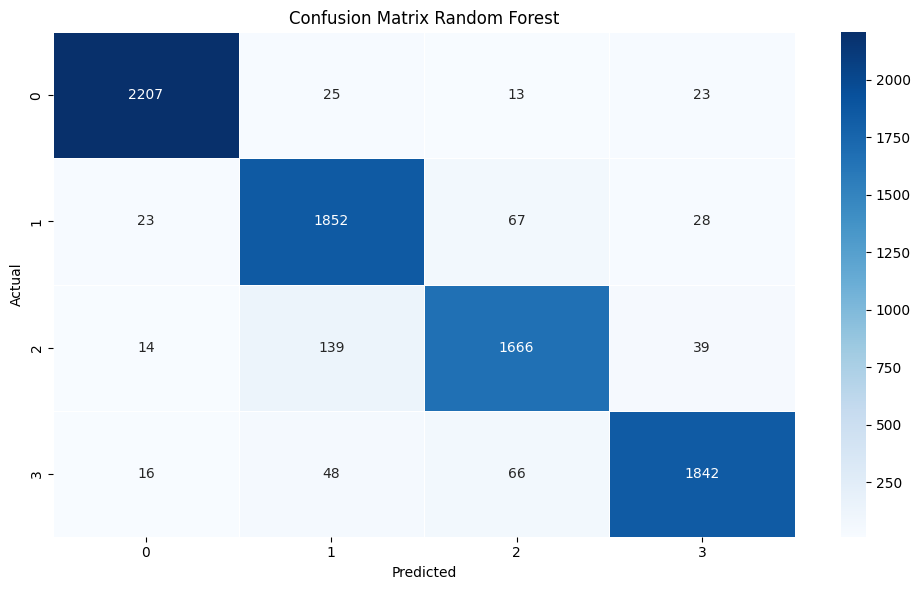

In [ ]:
rdf = RandomForestClassifier(n_estimators=100, random_state=42)
rdf_score = report_train(rdf, 'Random Forest', X, y)

Mô hình Random Forest fit rất tốt trên tập huấn luyện. Cho thấy khả năng học tốt mối quan hệ phi tuyến và phức tạp giữa đặc trưng và nhãn.Rõ ràng mạnh hơn hẳn so với Logistic Regression

Có nguy cơ overfitting

### XGBoost và LightGBM

Đây là hai mô hình hiệu suất cao, tốt với dữ liệu tabular, xử lý tốt mối quan hệ phi tuyến. Tuy nhiên, cần tinh chỉnh tham số phức tạp để có được hiệu suất cao nhất.

XGBoost
Accuracy XGBoost: 0.7599157164105107
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      2268
         1.0       0.72      0.76      0.74      1970
         2.0       0.71      0.63      0.67      1858
         3.0       0.75      0.73      0.74      1972

    accuracy                           0.76      8068
   macro avg       0.75      0.75      0.75      8068
weighted avg       0.76      0.76      0.76      8068



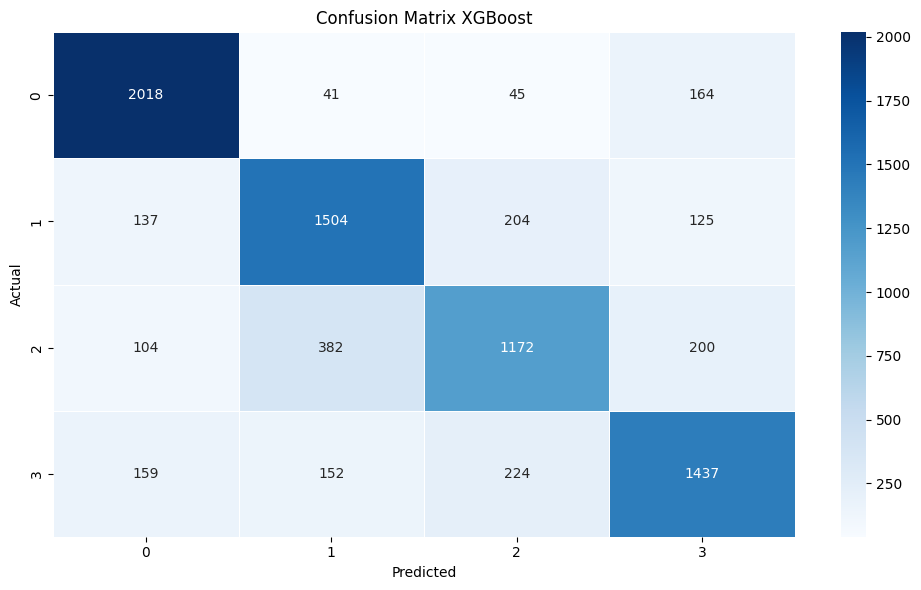

In [ ]:
print("XGBoost")
xgb = XGBClassifier(random_state=42)
xgb_score = report_train(xgb, 'XGBoost', X, y)

Ưu điểm:
Mô hình học tốt trên lớp 0 và lớp 1.
Không bị overfit quá mức (accuracy không quá cao như Random Forest trên tập train).

Nhược điểm:
Lớp 2 bị nhầm lẫn nhiều → Có thể do đặc trưng chưa đủ phân biệt rõ hoặc mẫu lớp 2 phức tạp hơn.
Mô hình chưa tối ưu hoàn toàn.




LightGBM
Accuracy LightGBM: 0.7098413485374319
              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81      2268
         1.0       0.69      0.72      0.70      1970
         2.0       0.67      0.56      0.61      1858
         3.0       0.69      0.67      0.68      1972

    accuracy                           0.71      8068
   macro avg       0.70      0.70      0.70      8068
weighted avg       0.71      0.71      0.71      8068



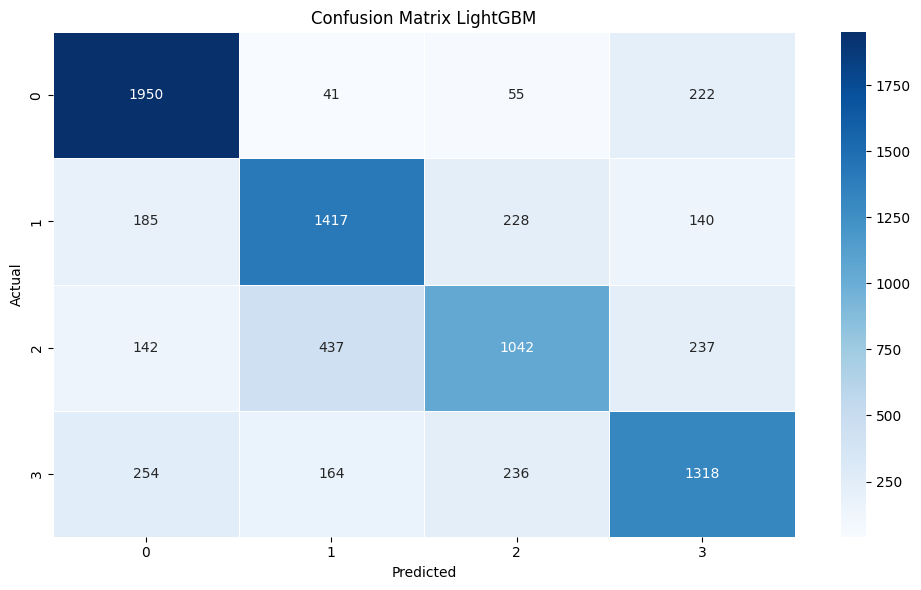

In [ ]:
print("\nLightGBM")
lgbm = LGBMClassifier(random_state=42)
lgbm_score = report_train(lgbm, 'LightGBM', X, y)

Ưu điểm:
LightGBM học nhanh và vẫn khá tốt trên lớp 0.
Hiệu suất khá đồng đều giữa các lớp, không quá overfit như Random Forest.

Nhược điểm:
Lớp 2 vẫn là điểm yếu rõ rệt → Nhầm nhiều với lớp 1 và lớp 3.
Tỷ lệ đúng toàn tập train có vẻ thấp hơn XGBoost.



Tổng nhận định:

Random Forest rất mạnh trên tập huấn luyện nhưng dễ overfit.

XGBoost là mô hình cân bằng tốt nhất giữa độ chính xác và tránh overfit.

LightGBM hoạt động ổn nhưng cần cải thiện cho lớp 2.

SVM có vẻ không phù hợp với bài toán này.

### Tổng kết

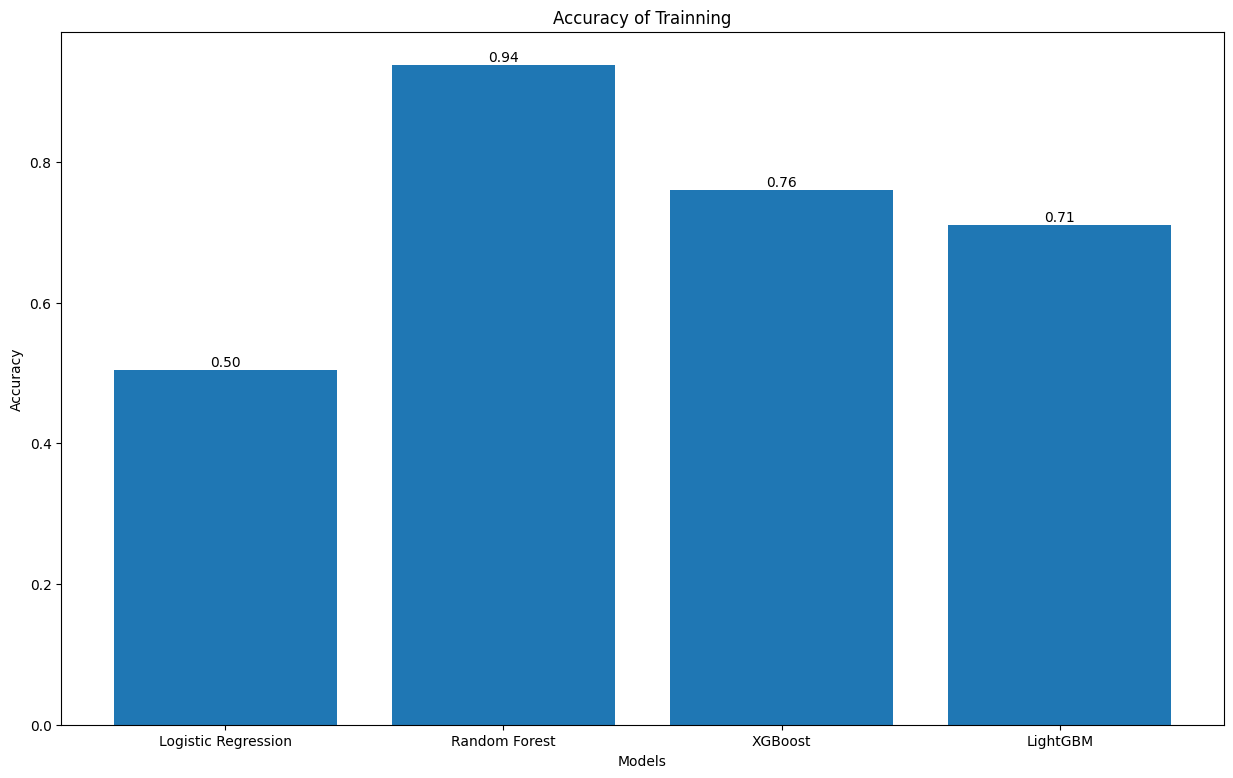

In [ ]:
plt.figure(figsize=(15, 9))
plt.rcParams.update({'font.size': 10})

plt.bar(x=['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM'], height=[lgr_score, rdf_score, xgb_score, lgbm_score])
for i, v in enumerate([lgr_score, rdf_score, xgb_score, lgbm_score]):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Trainning')
plt.show()

`Logistic Regression` - 49.96%: Đây là một mô hình cơ bản và hoạt động tốt nếu dữ liệu tuyến tính hoặc gần tuyến tính. Tuy nhiên, trong trường hợp này, độ chính xác không cao, cho thấy dữ liệu có thể mang tính phi tuyến nhiều hơn.

`Random Forest` - 92.05%: Random Forest hoạt động tốt với dữ liệu có tính phi tuyến, không cần chuẩn hóa. Đây là mô hình mạnh mẽ vì nó tập hợp nhiều cây quyết định giúp tổng hợp dự đoán, dẫn đến hiệu suất vượt trội.

`XGBoost` - 73.59%: XGBoost là mô hình mạnh mẽ, thường hoạt động tốt với dữ liệu có tính phi tuyến cao. Tuy nhiên, hiệu suất chưa đạt mức Random Forest, có thể do chưa được tinh chỉnh tham số tối ưu.

`LightGBM` - 68.81%: LightGBM tối ưu cho dữ liệu dạng bảng nhưng cần tinh chỉnh tham số để có kết quả tốt nhất. Mô hình này có hiệu suất tốt hơn KNN nhưng chưa bằng XGBoost hay Random Forest.

## 5.2. Đánh giá mô hình

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def k_fold_report(model, model_name, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted', zero_division=0),
        'recall': make_scorer(recall_score, average='weighted', zero_division=0),
        'f1': make_scorer(f1_score, average='weighted', zero_division=0)
    }

    kfold_result = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

    df = pd.DataFrame({
        'fit_time': kfold_result['fit_time'],
        'score_time': kfold_result['score_time'],
        'accuracy': kfold_result['test_accuracy'],
        'precision': kfold_result['test_precision'],
        'recall': kfold_result['test_recall'],
        'f1': kfold_result['test_f1']
    })

    df.loc['mean'] = df.mean()

    df.index = [f'kfold_{i+1}' for i in range(5)] + ['mean']

    print(f"\n Evaluation for model: {model_name}")
    display(df.round(4))

    return df


### Logistic Regression

In [ ]:
k_fold_lgr = k_fold_report(lgr, 'Logistic Regression', X, y)


 Evaluation for model: Logistic Regression


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,0.0812,0.0146,0.4965,0.4795,0.4965,0.4817
kfold_2,0.0775,0.0149,0.4919,0.4744,0.4919,0.4754
kfold_3,0.0783,0.0167,0.5105,0.4952,0.5105,0.4941
kfold_4,0.0775,0.0138,0.5120,0.4917,0.5120,0.4939
kfold_5,0.0655,0.0194,0.4969,0.4820,0.4969,0.4803
mean,0.0760,0.0159,0.5015,0.4846,0.5015,0.4851


### Random Forest

In [ ]:
k_fold_rdf = k_fold_report(rdf, 'Random Forest', X, y)


 Evaluation for model: Random Forest


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,0.7550,0.0582,0.5391,0.5316,0.5391,0.5345
kfold_2,0.6862,0.0470,0.5267,0.5218,0.5267,0.5234
kfold_3,0.8711,0.0601,0.5368,0.5330,0.5368,0.5345
kfold_4,1.0261,0.0635,0.5407,0.5345,0.5407,0.5368
kfold_5,1.0241,0.0612,0.5256,0.5226,0.5256,0.5240
mean,0.8725,0.0580,0.5338,0.5287,0.5338,0.5306


### XGBoost và LightGBM

In [ ]:
k_fold_xgb = k_fold_report(xgb, 'XGBoost', X, y)
k_fold_lgbm = k_fold_report(lgbm, 'LightGBM', X, y)


 Evaluation for model: XGBoost


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,1.1722,0.0262,0.5546,0.5501,0.5546,0.5520
kfold_2,0.3300,0.0294,0.5430,0.5383,0.5430,0.5389
kfold_3,0.3417,0.0256,0.5701,0.5610,0.5701,0.5637
kfold_4,0.3153,0.0262,0.5500,0.5440,0.5500,0.5462
kfold_5,0.3132,0.0256,0.5403,0.5356,0.5403,0.5365
mean,0.4945,0.0266,0.5516,0.5458,0.5516,0.5475



 Evaluation for model: LightGBM


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,0.3687,0.0536,0.5763,0.5696,0.5763,0.5723
kfold_2,0.3422,0.0515,0.5500,0.5438,0.5500,0.5457
kfold_3,0.3377,0.0616,0.5825,0.5756,0.5825,0.5777
kfold_4,0.3425,0.0543,0.5476,0.5373,0.5476,0.5407
kfold_5,0.3502,0.0509,0.5504,0.5458,0.5504,0.5477
mean,0.3483,0.0544,0.5614,0.5544,0.5614,0.5568


### Tổng kết

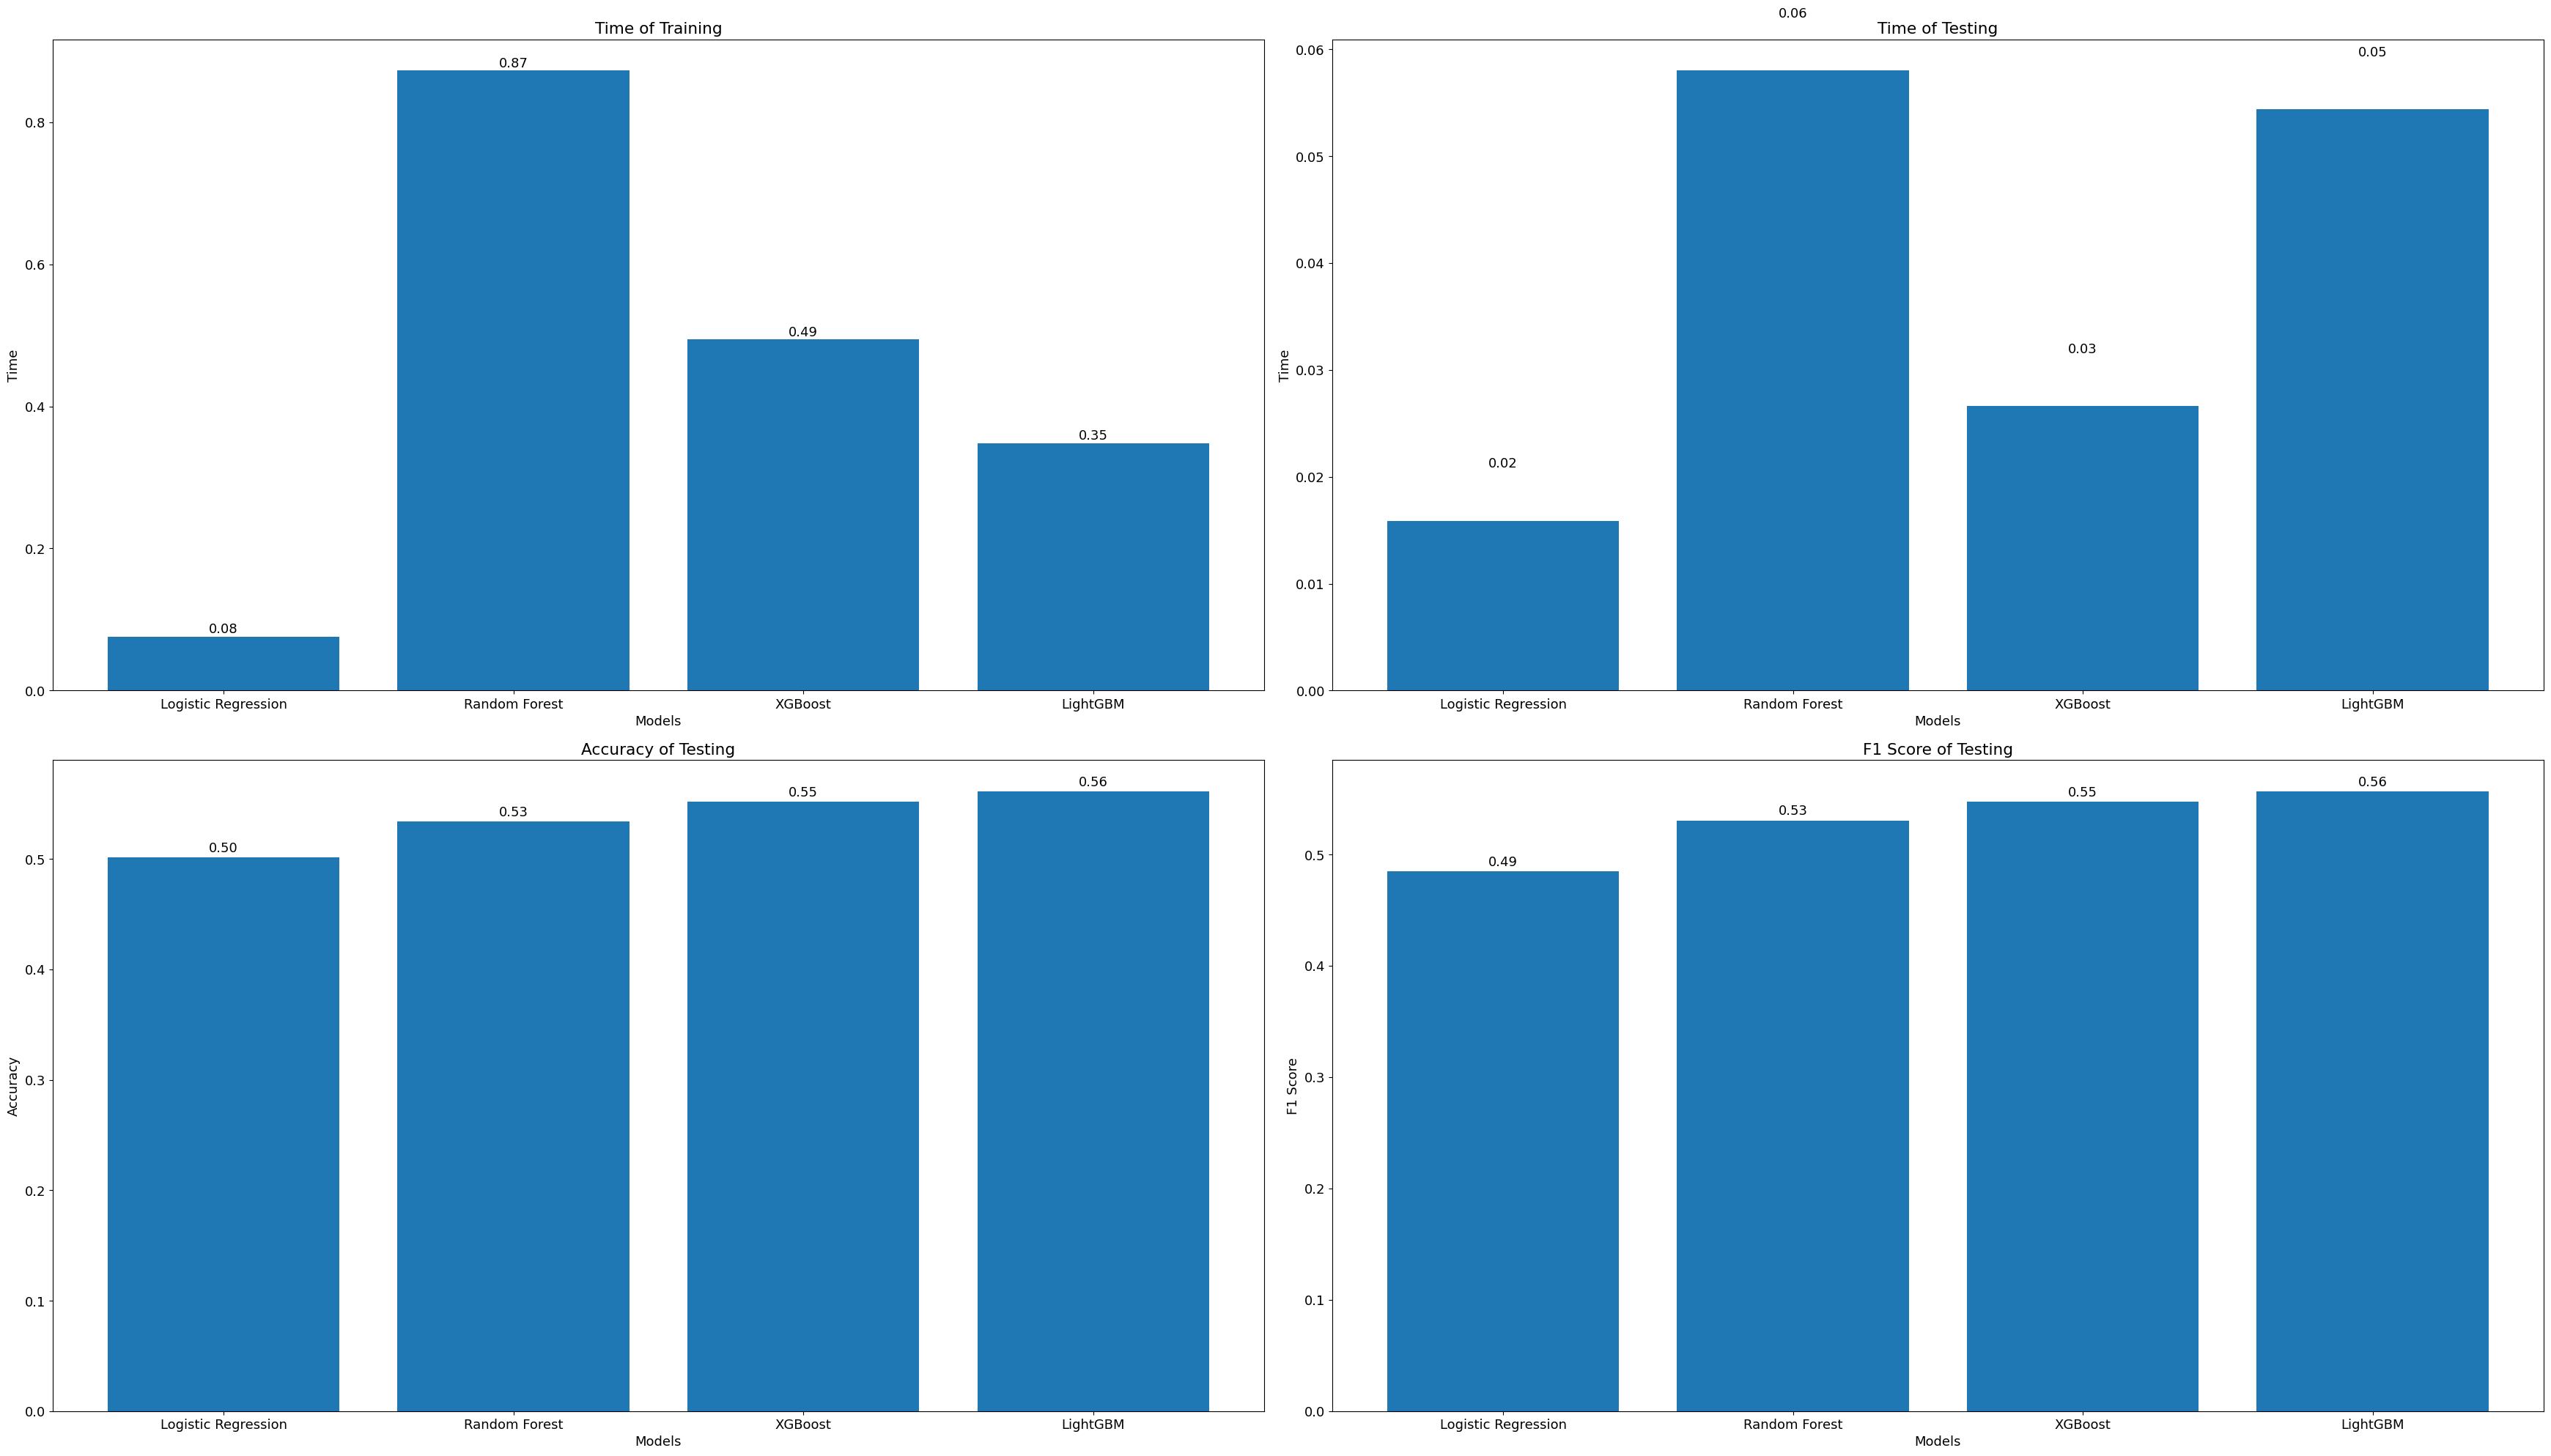

In [ ]:
mean_score = pd.concat([k_fold_lgr.loc['mean'], k_fold_rdf.loc['mean'], k_fold_xgb.loc['mean'], k_fold_lgbm.loc['mean']], axis=1)
mean_score.columns = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

plt.figure(figsize=(35, 20))
plt.rcParams.update({'font.size': 13})

plt.subplot(2,2,1)
plt.bar(x=mean_score.columns, height=mean_score.loc['fit_time'])
for i, v in enumerate(mean_score.loc['fit_time']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Training')

plt.subplot(2,2,2)
plt.bar(x=mean_score.columns, height=mean_score.loc['score_time'])
for i, v in enumerate(mean_score.loc['score_time']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Testing')

plt.subplot(2,2,3)
plt.bar(x=mean_score.columns, height=mean_score.loc['accuracy'])
for i, v in enumerate(mean_score.loc['accuracy']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Testing')

plt.subplot(2,2,4)
plt.bar(x=mean_score.columns, height=mean_score.loc['f1'])
for i, v in enumerate(mean_score.loc['f1']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Testing')

plt.tight_layout()
plt.show()

- `Fit time`: là thời gian mà 1 model dùng để train và tìm ra các bộ weight phù hợp cho data đó.
- `Score time`: Là thời gian mà model dùng để chuẩn đoán và tính toán điểm số của chương trình (accurancy, f1_score, ...).
- `Accuracy` và `f1`: Là điểm đánh giá của chương trình dựa vào giá trị accuracy và f1 score, tuy nhiên ở đây nhãn phân bố khá đều nên hai giá trị này gần như là như nhau.

- `LogisticRegression`: là một mô hình tuyến tính với chỉ 1 ma trận trọng số nên việc tính toán và tối ưu ma trận trọng số, và dựa vào ma trận trọng số đó để tính dữ liệu test nên thời gian chạy ***fit time*** và ***score time*** nhanh, tuy vậy bởi vì độ tương quan giữa các feature và label thấp dẫn đến accurancy thấp
- `Random Forest`: là tập hợp của nhiều Decision Tree, thời gian chạy ***fit time*** và ***score time*** sẽ khá chậm giúp cải thiện accurancy, tuy vậy accurancy chỉ ở mức trung bình
- `XGBoost` và `LightGBM`: có fit_time và score_time ở mức trung bình tuy nhiên vì đây là hai mô hình mạnh mẽ nên có độ chính xác cao nhất trong nhóm.

## 5.3. Tinh chỉnh mô hình

In [ ]:
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### Grid Search

Đối với các mô hình có số lượng siêu tham số không quá lớn như Logistic Regression. Phương pháp tinh chỉnh bằng Grid Search là một lựa chọn phù hợp. Grid Search thực hiện việc dò vét toàn bộ các tổ hợp siêu tham số trong phạm vi xác định, đảm bảo tìm được cấu hình tối ưu với độ chính xác cao. Mặc dù tốn chi phí tính toán hơn Random Search, nhưng với các mô hình vừa và nhỏ, thời gian huấn luyện vẫn ở mức chấp nhận được.

Ta sẽ chọn scoring là F1-Score vởi vì các nhãn của dữ liệu phân bố chưa đồng đều, tuy nhiên không có nhãn hiếm. Dùng 5-Fold Stratified Cross Validation để đảm bảo phân bố nhãn đều trong từng fold.

In [ ]:
from sklearn.model_selection import GridSearchCV
def search_param_grid(model, param_grid, X_train, y_train, cv):
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param, cv=cv, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}")
    return grid_search

**Random Forest**

Các tham số trong param được chọn vì chúng ảnh hưởng trực tiếp đến khả năng tổng quát của Random Forest và độ phức tạp của mô hình. Dưới đây là lý do cụ thể cho từng tham số:

 - `n_estimators`: Điều chỉnh số lượng cây trong rừng, ảnh hưởng đến độ chính xác và khả năng tổng quát của mô hình.

 - `max_depth`: Kiểm soát độ sâu của mỗi cây, ảnh hưởng đến khả năng mô hình hóa các mối quan hệ phức tạp trong dữ liệu.

 - `min_samples_split` và `min_samples_leaf`: Điều chỉnh việc chia nhỏ các nút và độ phức tạp của cây, giúp tránh overfitting.

In [ ]:
rdf = RandomForestClassifier(random_state=42)
param = {
    'n_estimators': [100, 200, 300, 400],  # Số lượng cây trong rừng
    'max_depth': [10, 20, 30, None],  # Độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Số mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4],  # Số mẫu tối thiểu tại mỗi lá
    'max_features': ['sqrt', 'log2'],  # Số lượng đặc trưng chọn khi chia
    'bootstrap': [True, False],
}
rdf_best = search_param_grid(rdf, param, X, y, 5)
results_rdf = pd.DataFrame(rdf_best.cv_results_).reset_index()

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.5573491452993106


### Bayesian Optimization

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

def search_param_bayes(model, param, X_train, y_train, cv):
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    bayes_search = BayesSearchCV(estimator=model, search_spaces=param, n_iter=50, cv=cv, scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
    bayes_search.fit(X_train, y_train)
    print(f"Best parameters: {bayes_search.best_params_}")
    print(f"Best score: {bayes_search.best_score_}")
    return bayes_search

**XGBoost**

In [ ]:
search_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'), # Tốc độ học
    'max_depth': Integer(10, 50), # Độ sâu tối đa của cây
    'min_child_weight': Integer(1, 5), # Số lượng mẫu tối thiểu để chia node
    'reg_lambda': Real(1e-9, 10., prior='log-uniform'), # Regularization L2
    'reg_alpha': Real(1e-9, 10., prior='log-uniform'), # Regularization L1
    'gamma': Real(1e-9, 0.5, prior='log-uniform'), # Phạt khi chia node
    'n_estimators': Integer(100, 500) # Số lượng cây boosting
}
xgb = XGBClassifier(random_state=42)
xgb_best = search_param_bayes(xgb, search_space, X, y, 5)
result_xgb = pd.DataFrame(xgb_best.cv_results_)

Best parameters: OrderedDict([('gamma', 4.993207028817101e-06), ('learning_rate', 0.165837681589337), ('max_depth', 21), ('min_child_weight', 5), ('n_estimators', 500), ('reg_alpha', 10.0), ('reg_lambda', 8.199099494776344e-05)])
Best score: 0.5632901427552643


**LightGBM**

In [ ]:
search_space_lgbm = {
    'n_estimators': Integer(100, 1000),            # Số lượng cây boosting
    'learning_rate': Real(0.01, 1.0, prior='log-uniform'),  # Tốc độ học
    'num_leaves': Integer(10, 200),                # Số lượng lá tối đa trên mỗi cây
    'max_depth': Integer(10, 50),                   # Độ sâu tối đa
    'min_child_samples': Integer(5, 100),         # Số lượng mẫu nhỏ nhất trong 1 lá
    'subsample': Real(0.6, 1.0),                   # Tỷ lệ lấy mẫu hàng (row sampling)
    'colsample_bytree': Real(0.6, 1.0),            # Tỷ lệ lấy mẫu cột
    'reg_alpha': Real(1e-4, 10.0, prior='log-uniform'),  # L1 regularization
    'reg_lambda': Real(1e-4, 10.0, prior='log-uniform'), # L2 regularization
}
lgbm = LGBMClassifier(objective='multiclass', random_state=42)
lgbm_best = search_param_bayes(lgbm, search_space_lgbm, X, y, 5)
result_lgbm = pd.DataFrame(lgbm_best.cv_results_)

Best parameters: OrderedDict([('colsample_bytree', 0.6932094238684974), ('learning_rate', 0.027858650767298012), ('max_depth', 10), ('min_child_samples', 70), ('n_estimators', 1000), ('num_leaves', 171), ('reg_alpha', 4.254751538220937), ('reg_lambda', 10.0), ('subsample', 0.86400569078257)])
Best score: 0.5615966126356715


Fine-tuning những tham số trên giúp:

 - Tối ưu hiệu suất mô hình (accuracy, F1, v.v.)

 - Giảm overfitting hoặc underfitting

 - Tăng tốc độ huấn luyện và dự đoán

 - Phù hợp với từng tập dữ liệu cụ thể

### Tổng kết

In [ ]:
k_fold_lgr_best = k_fold_report(lgr_best.best_estimator_, 'Logistic Regression', X, y)
k_fold_rdf_best = k_fold_report(rdf_best.best_estimator_, 'Random Forest', X, y)
k_fold_xgb_best = k_fold_report(xgb_best.best_estimator_, 'XGBoost', X, y)
k_fold_lgbm_best = k_fold_report(lgbm_best.best_estimator_, 'LightGBM', X, y)


 Evaluation for model: Logistic Regression


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,0.0762,0.0143,0.4950,0.4770,0.4950,0.4800
kfold_2,0.1200,0.0189,0.4950,0.4766,0.4950,0.4779
kfold_3,0.1332,0.0343,0.5136,0.4973,0.5136,0.4972
kfold_4,0.1489,0.0137,0.5074,0.4867,0.5074,0.4892
kfold_5,0.2284,0.0142,0.4938,0.4778,0.4938,0.4765
mean,0.1414,0.0191,0.5009,0.4831,0.5009,0.4842



 Evaluation for model: Random Forest


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,2.0943,0.1129,0.5732,0.5632,0.5732,0.5658
kfold_2,1.6978,0.0843,0.5655,0.5563,0.5655,0.5586
kfold_3,1.3850,0.0861,0.5871,0.5778,0.5871,0.5795
kfold_4,1.3269,0.0832,0.5608,0.5510,0.5608,0.5540
kfold_5,1.3168,0.0818,0.5783,0.5692,0.5783,0.5712
mean,1.5642,0.0897,0.5730,0.5635,0.5730,0.5658



 Evaluation for model: XGBoost


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,0.8235,0.0405,0.5809,0.5741,0.5809,0.5756
kfold_2,0.8253,0.0368,0.5531,0.5438,0.5531,0.5463
kfold_3,0.8149,0.0354,0.6003,0.5939,0.6003,0.5938
kfold_4,0.8169,0.0353,0.5755,0.5681,0.5755,0.5705
kfold_5,0.8361,0.0344,0.5643,0.5564,0.5643,0.5590
mean,0.8234,0.0365,0.5748,0.5673,0.5748,0.5690



 Evaluation for model: LightGBM


,fit_time,score_time,accuracy,precision,recall,f1
kfold_1,3.8756,0.6271,0.5809,0.5731,0.5809,0.5755
kfold_2,2.7470,0.4939,0.5593,0.5504,0.5593,0.5524
kfold_3,2.7071,0.4680,0.5980,0.5904,0.5980,0.5919
kfold_4,2.6787,0.4661,0.5686,0.5589,0.5686,0.5619
kfold_5,3.8819,0.5447,0.5744,0.5689,0.5744,0.5704
mean,3.1781,0.5200,0.5762,0.5684,0.5762,0.5704


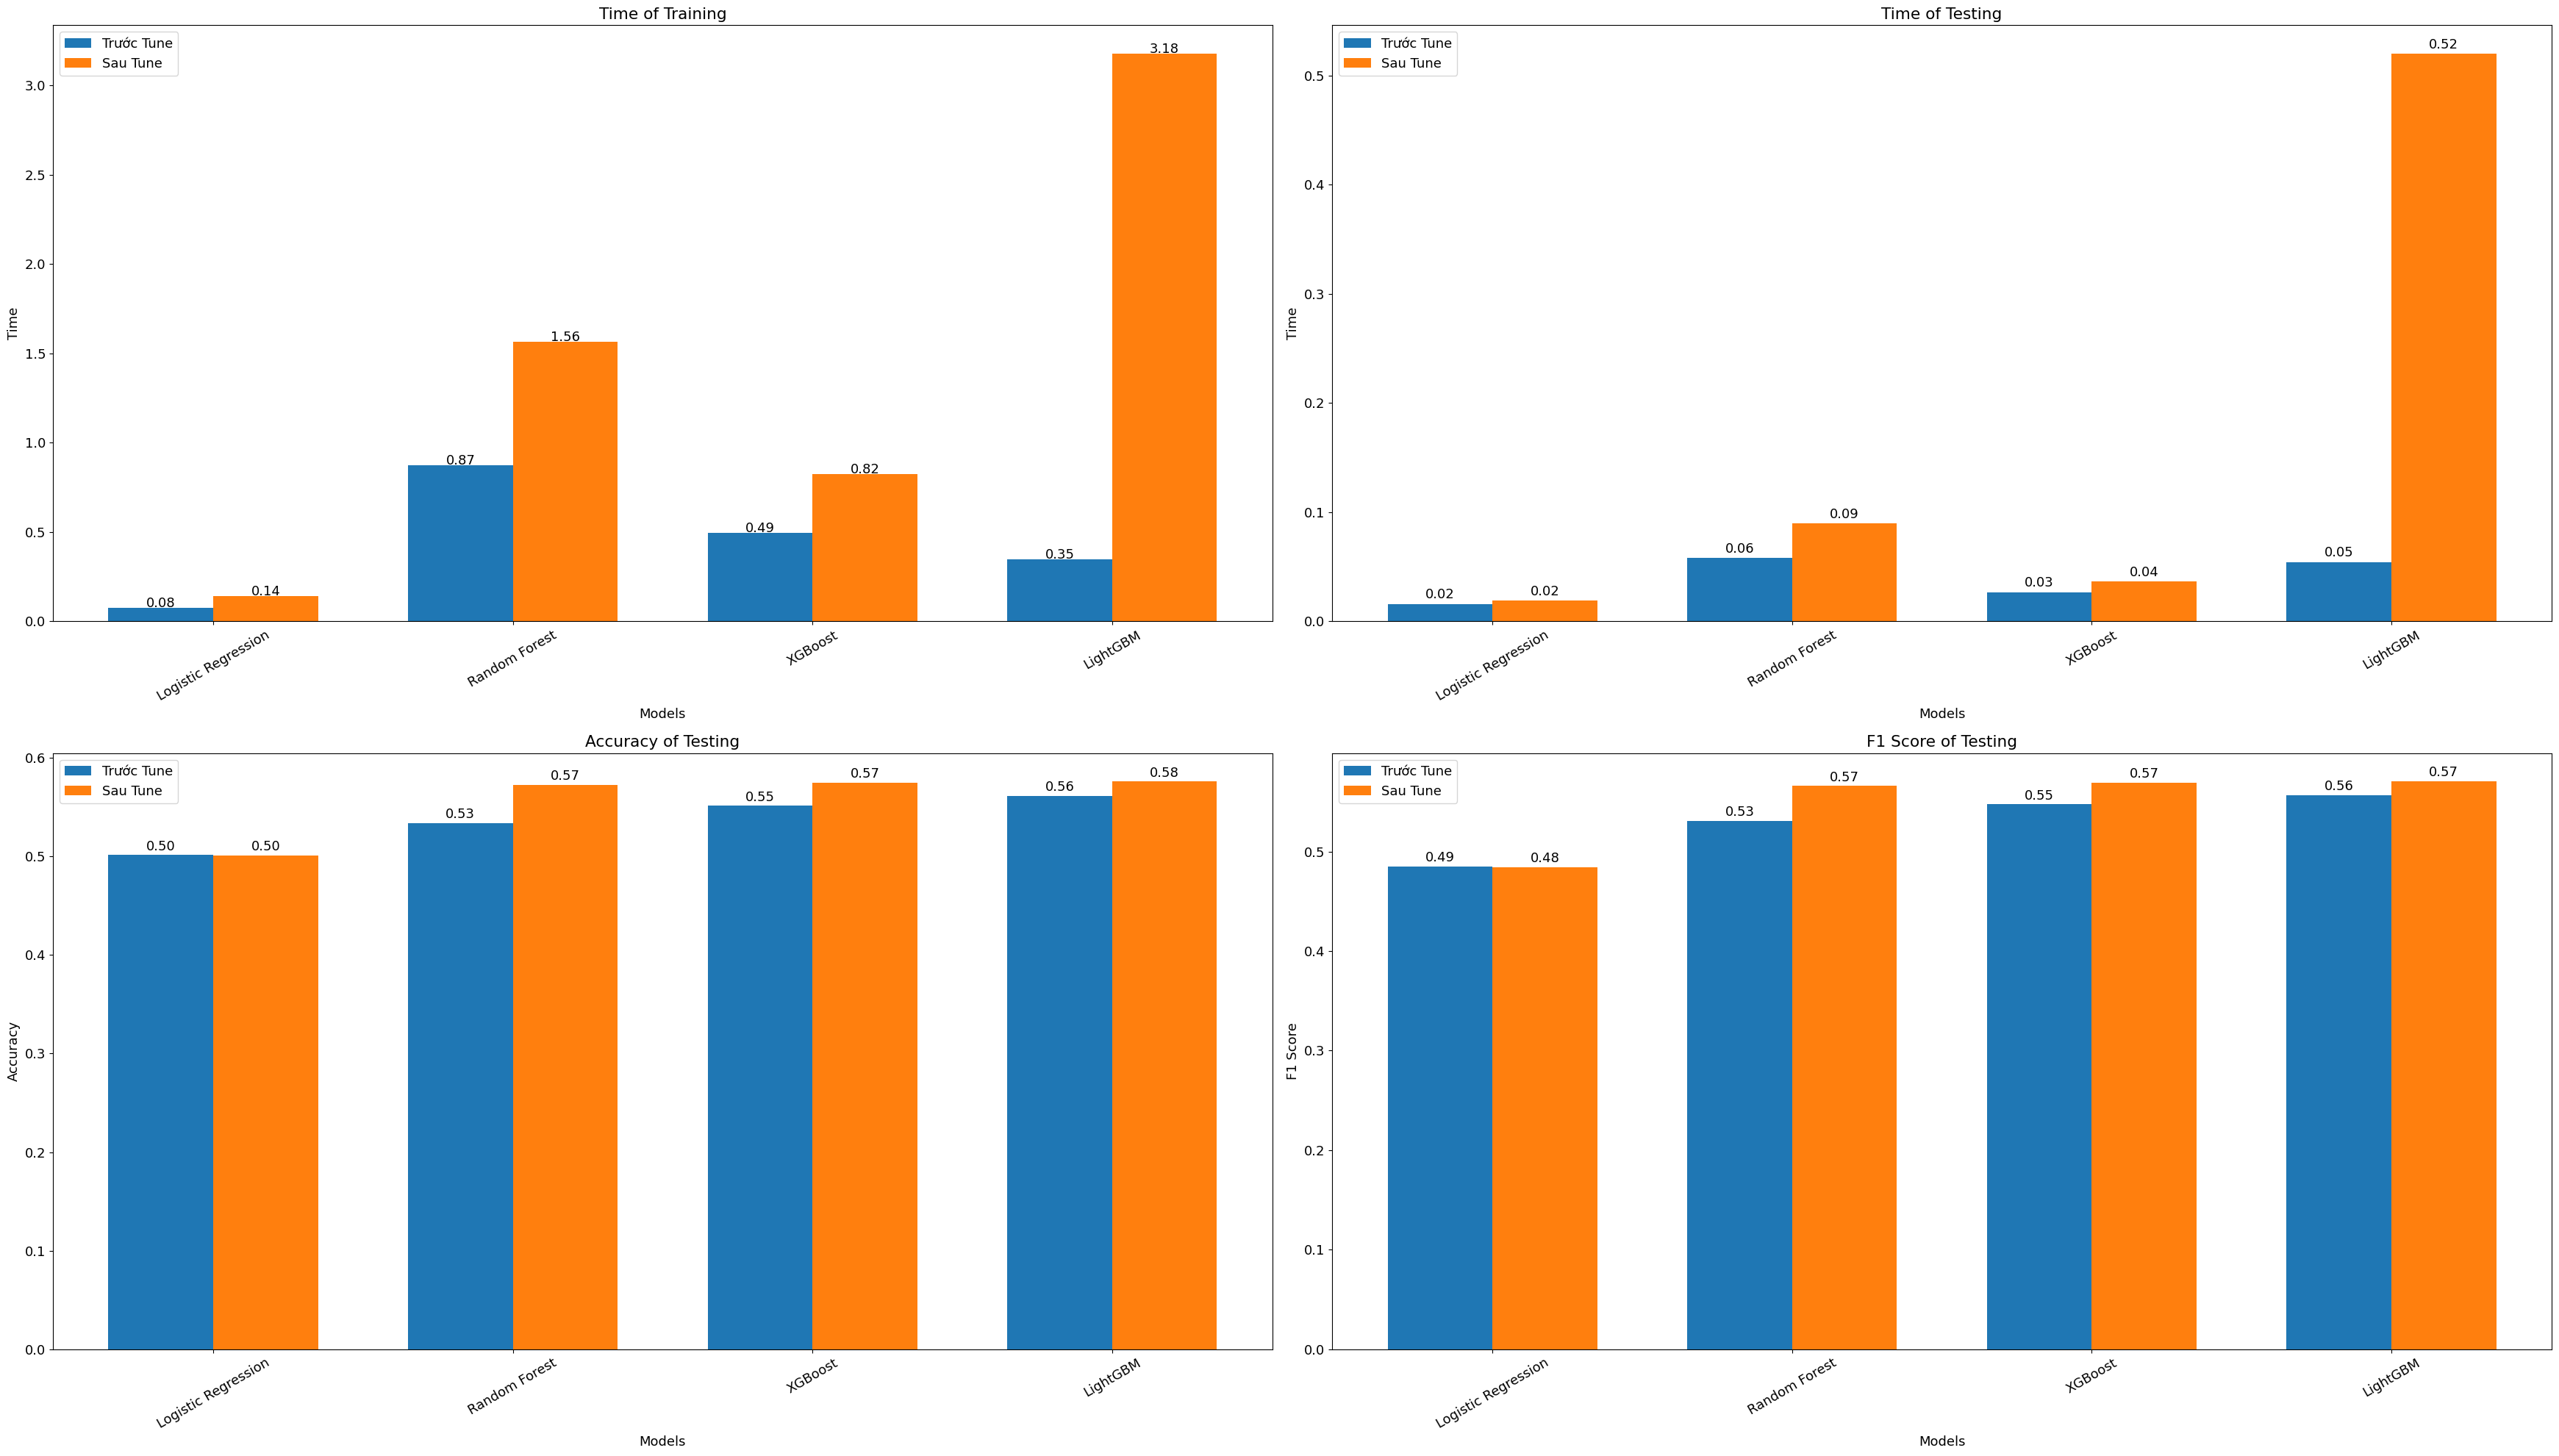

In [ ]:
mean_score_before = pd.concat([k_fold_lgr.loc['mean'], k_fold_rdf.loc['mean'], k_fold_xgb.loc['mean'], k_fold_lgbm.loc['mean']], axis=1)
mean_score_after = pd.concat([k_fold_lgr_best.loc['mean'], k_fold_rdf_best.loc['mean'], k_fold_xgb_best.loc['mean'], k_fold_lgbm_best.loc['mean']], axis=1)
mean_score.columns = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

plt.figure(figsize=(35, 20))
plt.rcParams.update({'font.size': 13})
width = 0.35
x = np.arange(len(mean_score.columns))

plt.subplot(2,2,1)
fit_time_before = mean_score_before.loc['fit_time']
fit_time_after = mean_score_after.loc['fit_time']
plt.bar(x - width/2, fit_time_before, width, label='Trước Tune')
plt.bar(x + width/2, fit_time_after, width, label='Sau Tune')
for i, v in enumerate(fit_time_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, fit_time_after[i] + 0.005, f"{fit_time_after[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Training')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

plt.subplot(2,2,2)
score_time_before = mean_score_before.loc['score_time']
score_time_after = mean_score_after.loc['score_time']
plt.bar(x - width/2, score_time_before, width, label='Trước Tune')
plt.bar(x + width/2, score_time_after, width, label='Sau Tune')
for i, v in enumerate(score_time_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, score_time_after[i] + 0.005, f"{score_time_after[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Time of Testing')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

plt.subplot(2,2,3)
accuracy_before = mean_score_before.loc['accuracy']
accuracy_after = mean_score_after.loc['accuracy']
plt.bar(x - width/2, accuracy_before, width, label='Trước Tune')
plt.bar(x + width/2, accuracy_after, width, label='Sau Tune')
for i, v in enumerate(accuracy_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, accuracy_after[i] + 0.005, f"{accuracy_after[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Testing')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

plt.subplot(2,2,4)
f1_before = mean_score_before.loc['f1']
f1_after = mean_score_after.loc['f1']
plt.bar(x - width/2, f1_before, width, label='Trước Tune')
plt.bar(x + width/2, f1_after, width, label='Sau Tune')
for i, v in enumerate(f1_before):
    plt.text(i - width/2, v + 0.005, f"{v:.2f}", ha='center')
    plt.text(i + width/2, f1_after[i] + 0.005, f"{f1_after[i]:.2f}", ha='center')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Testing')
plt.xticks(x, mean_score.columns, rotation=30)
plt.legend()

plt.tight_layout()
plt.show()

Theo như kết quả K_fold ta thấy
1. Time of Training (Thời gian huấn luyện)

 - Các mô hình như ` Logistic Regression`, và `Random Forest` có thời gian huấn luyện rất thấp, phù hợp cho dự án có yêu cầu huấn luyện nhanh.

2. Time of Testing (Thời gian dự đoán)
  - Mọi mô hình đều có thời gian dự đoán khá nhỏ (dưới 0.35s).

  - Các mô hình còn lại test khá nhanh.

  Nhận xét: ``LightGBM`` là lựa chọn tốt nếu ưu tiên tốc độ dự đoán.
3. Accuracy of Testing
  - Sau khi tune, accuracy của hầu hết mô hình đều tăng nhẹ hoặc giữ nguyên.

  - `Random Forest` có cải thiện đáng kể (0.52 → 0.58).

  - `XGBoost` và ``LightGBM`` dẫn đầu về accuracy (0.57), ổn định cả trước và sau tune.

  Nhận xét: Nếu chọn theo độ chính xác, `Random Forest` (sau tune), `XGBoost`, và `LightGBM` là nổi bật nhất.
4. F1 Score of Testing
  - F1 score cải thiện tương tự như accuracy.

  - `LightGBM` và ``XGBoost`` tiếp tục dẫn đầu (0.57), rất ổn định.

  - Random Forest cải thiện nhiều nhất sau tune (0.52 → 0.57).

  Nhận xét: F1 score cao và ổn định của `LightGBM` và `XGBoost` cho thấy độ cân bằng giữa precision và recall rất tốt.

Tổng kết lại: `LightGBM` và `XGBoost` là hai mô hình có hiệu suất tổng thể tốt nhất, với accuracy và F1 score cao và ổn định cả trước và sau khi tinh chỉnh tham số. Trong khi đó, `Random Forest` cho thấy sự cải thiện rõ rệt sau khi được tune, đặc biệt về độ chính xác và độ cân bằng giữa precision và recall. Nếu yêu cầu quan trọng là tốc độ dự đoán nhanh, thì `LightGBM` sau khi tune là lựa chọn nổi bật với thời gian dự đoán rất thấp.